In [3]:
import xarray as xr
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from tqdm import tqdm
# %matplotlib notebook

# Functions

In [2]:
'''
DEFAULTS FUNCTIONS
------------------
'''
import math 
def convert_gpstime(gpstime, date, convert=False):
    def frmt(decimal_time): # You can rewrite it with 'while' if you wish
        hours = int(decimal_time)#
        minutes = np.round(decimal_time - hours, 4)*60
        seconds = np.round(minutes - int(minutes), 4)*60
        HMS_time = f'{hours}:{int(minutes)}:{int(seconds)}'#"%s:%s:%f"%(hours, int(minutes), int(seconds))
        return HMS_time
    if convert==True:
        list_HMS_time = list(map(frmt, gpstime))
        list_YMD_HMS = list(map(lambda orig_string: date+' '+orig_string, list_HMS_time))
        pd_YMD_HMS = pd.to_datetime(list_YMD_HMS).strftime('%Y-%m-%d %H:%M:%S')
    else:
        list_gpstime_str = list(map(lambda n: '%.3f'%n, gpstime))
        list_YMD_HMS = list(map(lambda orig_string: date+' '+orig_string, list_gpstime_str))
        pd_YMD_HMS = list_YMD_HMS
    return pd_YMD_HMS


def remove_NaN_Inf_values(arrayX, arrayY):
    idsX = np.where(~np.isnan(arrayX)&~np.isinf(arrayX))[0]
    idsY = np.where(~np.isnan(arrayY)&~np.isinf(arrayY))[0]
    print(idsX, idsY)
    mask = np.intersect1d(idsX, idsY)
    return mask

def find_nearest_index(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [67]:
'''
FUNCTION OF SR DISTRIBUTION
---------------------------
'''

def get_params_histogram(srlimite, Xdata, Ydata):
    def remove_NaN_Inf_values(arrayX, arrayY):
        idsX = np.where(~np.isnan(arrayX)&~np.isinf(arrayX))[0]
        idsY = np.where(~np.isnan(arrayY)&~np.isinf(arrayY))[0]
        print(idsX, idsY)
        mask = np.intersect1d(idsX, idsY)
        return mask
    
    from scipy import stats
    from scipy.optimize import curve_fit
    # objective function for best fit
    def objective(x, a, b):
        return a * x + b
    
#     if (~np.isnan(Xdata)|~np.isinf(Xdata)).sum() > (~np.isnan(Ydata)|~np.isinf(Ydata)).sum():
    mask = remove_NaN_Inf_values(Xdata, Ydata)
    print('A')
    H = np.histogram2d(Xdata[mask], Ydata[mask], bins=100, range = srlimite)
    Hprobas = H[0]*100/len(Ydata[mask])
    noNaNpoints = len(Ydata[mask])

    print(f'nombre de points no-NaN: {noNaNpoints}')
    xedges, yedges = np.meshgrid(H[1], H[2])
#     print(slope, intercept)
#     fitLine = slope * allsr532 + intercept
    return xedges, yedges, Hprobas, noNaNpoints

def find_nearest_index(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx


In [14]:
'''
FUNCTION OF CLOUD FILTER
------------------------
'''
def get_data_AboveBelow_cloud_top_height():
    return dataset

# Processing data

In [2]:
'''
Directory of RAW DATA & CALIBRATED DATA
'''
ER2_DIR = Path('/homedata/nmpnguyen/ORACLES-ER2/')
ER2CALIB_DIR = Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/')


## 1.__Histogramme SR (total)__

In [32]:
allatb355 = None
allatb532 = None 
allsr355 = None
allsr532 = None 
for er2path in sorted(Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/').glob('*_R8.h5')):
    data = xr.open_dataset(er2path)
    sr532 = (data['calibrated']/data['molecular']).sel(wavelength=532)
    sr355 = (data['calibrated']/data['molecular']).sel(wavelength=355)
    if (allatb355 is None )| (allsr355 is None):
        allatb355 = data['calibrated'].sel(wavelength=355)
        allsr355 = sr355
    else:
        allatb355 = xr.concat([allatb355, data['calibrated'].sel(wavelength=355)], dim='time')
        allsr355 = xr.concat([allsr355, sr355], dim='time')

        
    if (allatb532 is None ) | (allsr532 is None):
        allatb532 = data['calibrated'].sel(wavelength=532)
        allsr532 = sr532
    else: 
        allatb532 = xr.concat([allatb532, data['calibrated'].sel(wavelength=355)], dim='time')
        allsr532 = xr.concat([allsr532, sr532], dim='time')
        
    print(er2path)
    print(~np.isnan(sr532.values).all(axis=1).sum())


/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160819_R8.h5
-431
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160823_R8.h5
-927
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160826_R8.h5
-108
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160912_R8.h5
-413
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160916_R8.h5
-463
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160918_R8.h5
-595
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160920_R8.h5
-560
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160922_R8.h5
-448
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160924_R8.h5
-506


[  887769   887770   887771 ... 42910879 42910881 42910883] [  724334   724335   724336 ... 42910879 42910881 42910883]
A
[ 5.75535469 -4.3274423 ] [[ 1.35825141e-07 -1.46556879e-07]
 [-1.46556879e-07  9.45583061e-07]]
nombre de points no-NaN: 19488916


<ipython-input-33-59a0e2df4a79>:11: RuntimeWarning: invalid value encountered in log10
  Xx, Yy, histoSR, _ = get_params_histogram([[-8,1], [-8,1]], np.log10(allatb532.values.ravel()), np.log10(allatb355.values.ravel()))


[  724334   724335   724336 ... 42914981 42914983 42914985] [  887769   887770   887771 ... 42914981 42914983 42914985]
A
[ 0.78230871 -0.58359137] [[7.35478431e-09 2.04949543e-08]
 [2.04949543e-08 5.76701950e-08]]
nombre de points no-NaN: 19832479


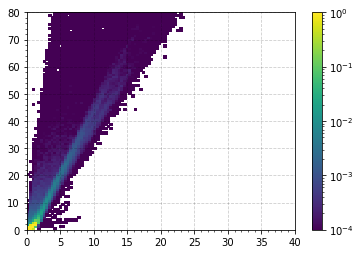

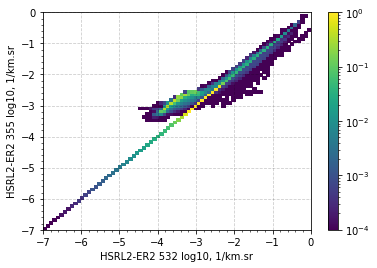

In [33]:
%matplotlib inline
from matplotlib.colors import LogNorm
Xx, Yy, histoSR, _ = get_params_histogram([[0, 40],[0, 80]], allsr355.values.ravel(), allsr532.values.ravel())
fig, ax = plt.subplots()
pcm = ax.pcolormesh(Xx, Yy, histoSR.T, norm = LogNorm(vmin=1e-4, vmax=1e0))
plt.colorbar(pcm, ax=ax)
plt.minorticks_on()
# ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
ax.grid(b=True, which='major', color='k', linestyle='--', alpha=0.2)

Xx, Yy, histoSR, _ = get_params_histogram([[-8,1], [-8,1]], np.log10(allatb532.values.ravel()), np.log10(allatb355.values.ravel()))
fig, ax = plt.subplots()
pcm = ax.pcolormesh(Xx, Yy, histoSR.T, norm = LogNorm(vmin=1e-4, vmax=1e0))
plt.colorbar(pcm, ax=ax)
ax.set(xlabel='HSRL2-ER2 532 log10, 1/km.sr', ylabel='HSRL2-ER2 355 log10, 1/km.sr')
ax.set_xlim(-7.0, 0.0)
ax.set_ylim(-7.0, 0.0)
plt.minorticks_on()
# ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
ax.grid(b=True, which='major', color='k', linestyle='--', alpha=0.2)

## 2.__Déterminer les points SR532/SR355 > 7 & SR532 > 60__

In [21]:
selected_cond = (allsr532/allsr355 > 7) & (allsr532 > 60)
print(np.where(selected_cond))
selected_allsr355 = allsr355.values[(selected_cond)]
selected_allsr532 = allsr532.values[(selected_cond)]
selected_allatb355 = allatb355.values[(selected_cond)]
selected_allatb532 = allatb532.values[(selected_cond)]

(array([  484,   529,   529, ..., 20367, 20369, 20396]), array([132, 112, 113, ...,  76,  77,  73]))


[    0     1     2 ... 32955 32956 32957] [    0     1     2 ... 32955 32956 32957]
A
[ 6.9576432  35.82349066] [[ 0.00010587 -0.00242504]
 [-0.00242504  0.07457073]]
nombre de points no-NaN: 32958
[    0     1     2 ... 32955 32956 32957] [    0     1     2 ... 32955 32956 32957]
A
[ 0.98950599 -0.01467974] [[2.93406571e-07 3.75204666e-07]
 [3.75204666e-07 5.00983856e-07]]
nombre de points no-NaN: 32958


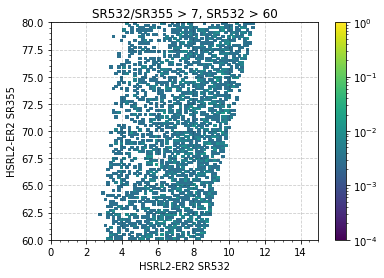

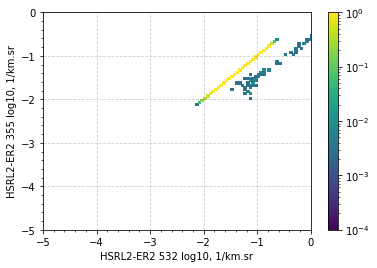

In [23]:
%matplotlib inline
from matplotlib.colors import LogNorm
Xx, Yy, histoSR, _ = get_params_histogram([[0, 15],[60, 80]], selected_allsr355, selected_allsr532)
fig, ax = plt.subplots()
pcm = ax.pcolormesh(Xx, Yy, histoSR.T, norm = LogNorm(vmin=1e-4, vmax=1e0))
plt.colorbar(pcm, ax=ax)
plt.minorticks_on()
# ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
ax.grid(b=True, which='major', color='k', linestyle='--', alpha=0.2)
ax.set(ylabel='HSRL2-ER2 SR532', xlabel='HSRL2-ER2 SR355', title='SR532/SR355 > 7, SR532 > 60')

Xx, Yy, histoSR, _ = get_params_histogram([[-4,1], [-4,1]], np.log10(selected_allatb532), np.log10(selected_allatb355))
fig, ax = plt.subplots()
pcm = ax.pcolormesh(Xx, Yy, histoSR.T, norm = LogNorm(vmin=1e-4, vmax=1e0))
plt.colorbar(pcm, ax=ax)
ax.set(xlabel='HSRL2-ER2 532 log10, 1/km.sr', ylabel='HSRL2-ER2 355 log10, 1/km.sr')
ax.set_xlim(-5.0, 0.0)
ax.set_ylim(-5.0, 0.0)
plt.minorticks_on()
# ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
ax.grid(b=True, which='major', color='k', linestyle='--', alpha=0.2)

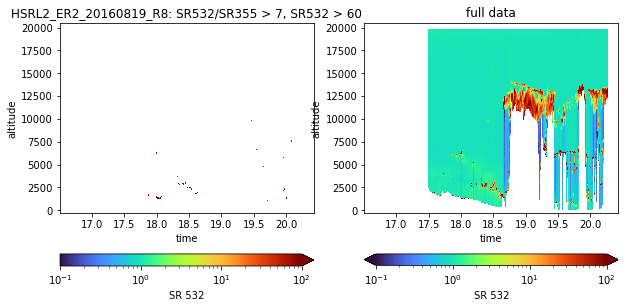

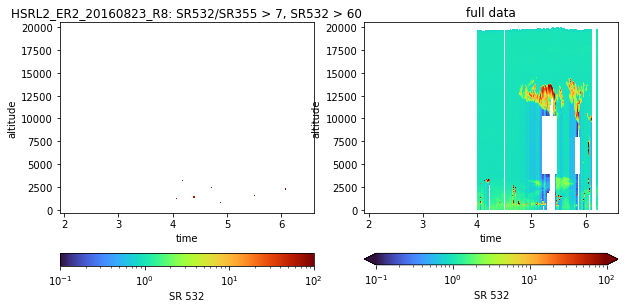

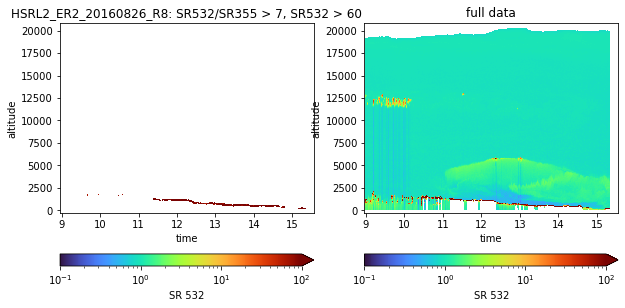

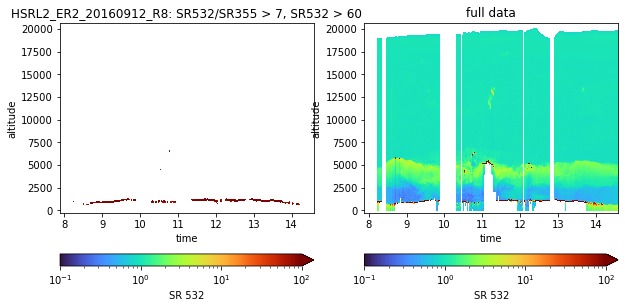

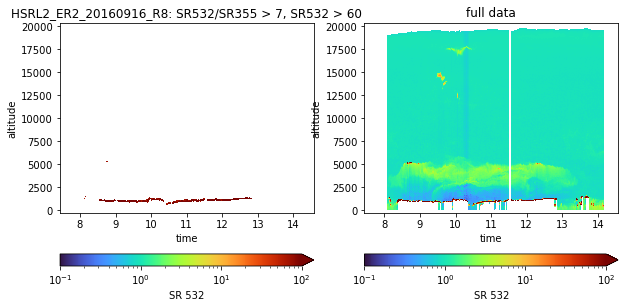

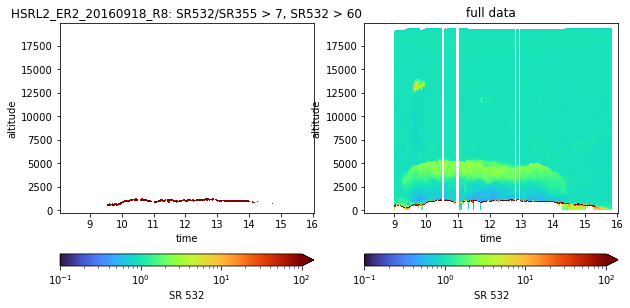

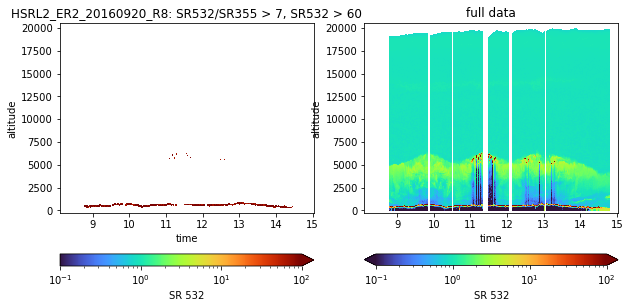

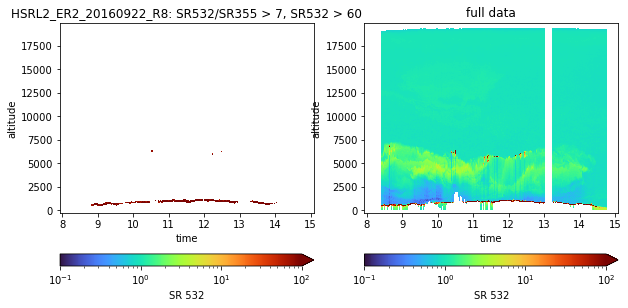

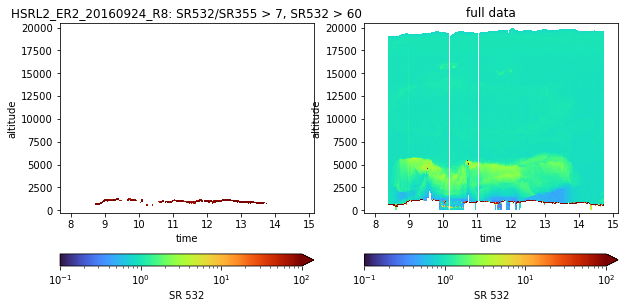

In [4]:
%matplotlib inline
ER2_LISTFILES = sorted(ER2CALIB_DIR.glob('*.h5'))
for i in range(len(ER2_LISTFILES)):
    data = xr.open_dataset(ER2_LISTFILES[i])
    sr355 = (data['calibrated']/data['molecular']).sel(wavelength=355)
    sr532 = (data['calibrated']/data['molecular']).sel(wavelength=532)
    sr355.coords['bug_mask']=sr355.where((sr532/sr355 > 7)&(sr532>60), other=-1, drop=0)
    sr532.coords['bug_mask']=sr532.where((sr532/sr355 > 7)&(sr532>60), other=-1, drop=0)
    
    fig, ax = plt.subplots(ncols=2, figsize=(10,5))
    sr532.where((sr532.bug_mask!=-1)).plot(y='altitude', x='time', norm=LogNorm(vmax=1e2, vmin=1e-1), ax=ax[0], 
                                                           cbar_kwargs={'orientation':'horizontal', 'label':'SR 532'}, cmap = 'turbo')
    ax[0].set(title=f'{ER2_LISTFILES[i].stem}: SR532/SR355 > 7, SR532 > 60')
    sr532.plot(y='altitude', x='time', norm=LogNorm(vmax=1e2, vmin=1e-1), ax=ax[1], 
                     cbar_kwargs={'orientation':'horizontal', 'label':'SR 532'}, cmap = 'turbo')
    ax[1].set(title=f'full data')
    plt.savefig(Path(ER2_DIR, 'Figs', f'ql_sr532-sup60_{ER2_LISTFILES[i].stem}.png'))

## 3.__Hypothèse__
1. Si c'est l'effet de l'écho sol ? --> Découvrir Latitude/Longitude du vol
2. Si les profils traversent une couche d'aérosols puis rentrent dans le nuages --> Découvrir "cloud_top_height" 
3. Calculer l'épaisseur de la couche où le signal s'atténue totalement

### 1. Trajectoire de vols

/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160819_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160823_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160826_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160912_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160916_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160918_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160920_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160922_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160924_R8.h5


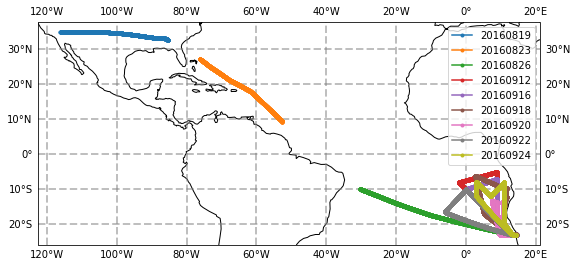

In [9]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

%matplotlib inline
fig, ax = plt.subplots(figsize=(9,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')



# gl.xlabels_top = False
# gl.ylabels_left = False
# gl.xlines = False
ax.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
ax.xformatter = LONGITUDE_FORMATTER
ax.yformatter = LATITUDE_FORMATTER
ax.xlabel_style = {'size': 15, 'color': 'gray'}
ax.xlabel_style = {'color': 'red', 'weight': 'bold'}

for er2path in sorted(Path('/homedata/nmpnguyen/ORACLES-ER2/').glob('*_R8.h5')):
    print(er2path)
    Nav_Data = xr.open_dataset(er2path, group='Nav_Data')  
    ax.plot(Nav_Data['gps_lon'].values, Nav_Data['gps_lat'].values, marker='.',
        transform=ccrs.Geodetic(), label=f'{er2path.stem.split("_")[2]}')

ax.legend()

La plupart des vols est fait sur l'océan. Donc la raison de l'échos sol est refusée. 

### 2.

/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160826_R8.h5
(2360, 1)
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160912_R8.h5
(2393, 1)


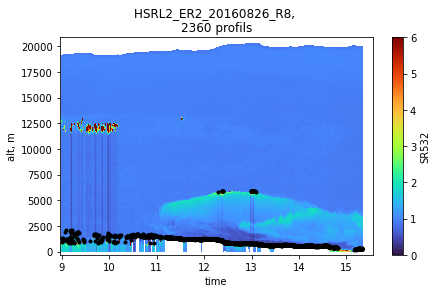

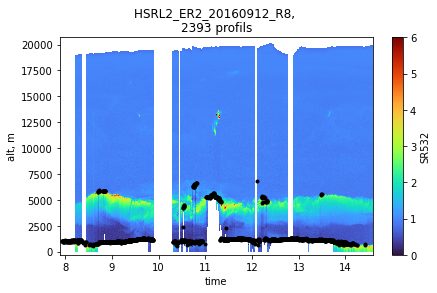

In [99]:
from matplotlib.colors import LogNorm 

ER2_PATH = Path('/homedata/nmpnguyen/ORACLES-ER2/')
ER2_LISTFILES = sorted(ER2_PATH.glob('*R8.h5'))

for filepath in ER2_LISTFILES[2:4]:
    print(filepath)
    DataProducts = xr.open_dataset(filepath, group='DataProducts')
    cloud_top_height = DataProducts['cloud_top_height'].values
    print(cloud_top_height.shape)
    data_above = xr.open_dataset(Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/', filepath.name))
#     data_above = get_data_AboveBelow_cloud_top_height(filepath.name, cloud_top_height, 'above')

    sr355_above = (data_above['calibrated']/data_above['molecular']).sel(wavelength=355)#.where(data_above.mask_cth!=1)
    sr532_above = (data_above['calibrated']/data_above['molecular']).sel(wavelength=532)#.where(data_above.mask_cth!=1)

    sr355 = sr355_above.values#np.concatenate([sr355_above, sr355_all], axis=1)
    sr532 = sr532_above.values#np.concatenate([sr532_above, sr532_all], axis=1)
    
    figs, ax0 = plt.subplots(figsize=(7,4))
    pcm = ax0.pcolormesh(data_above.time.values, data_above.altitude.values, sr532.T, vmin=0, vmax=6, cmap='turbo')
    plt.colorbar(pcm, ax=ax0, label='SR532')
    ax0.scatter(data_above.time.values, cloud_top_height, marker='.', color='k')
    ax0.set(xlabel='time', ylabel='alt, m', title=f'{filepath.stem}, \n{data_above.time.values.shape[0]} profils')



### Découvrir le cas 20160918 et 20160826 

- Le QL découpé 0-6km d'altitude en SR532, SR355, ATB 532, ATB 355, SR532/SR355
- Quelques profils d'exemple

Objectif: Comprendre la variation de SR à l'intérieur des aérosols et des cirrus

In [182]:
er2path = Path(ER2CALIB_DIR, 'HSRL2_ER2_20160826_R8.h5')
data = xr.open_dataset(er2path)
sr355 = (data['calibrated']/data['molecular']).sel(wavelength=355)
sr532 = (data['calibrated']/data['molecular']).sel(wavelength=532)
atb355 = data['calibrated'].sel(wavelength=355)
atb532 = data['calibrated'].sel(wavelength=532)

DataProducts = xr.open_dataset(Path(ER2_DIR, er2path.name), group='DataProducts')
DataProducts
cloud_top_height = DataProducts['cloud_top_height'].values
ext532 = DataProducts['532_ext'].values
ext355 = DataProducts['355_ext'].values

In [59]:
ylim = (0,2000)
xlim = (13, 15)

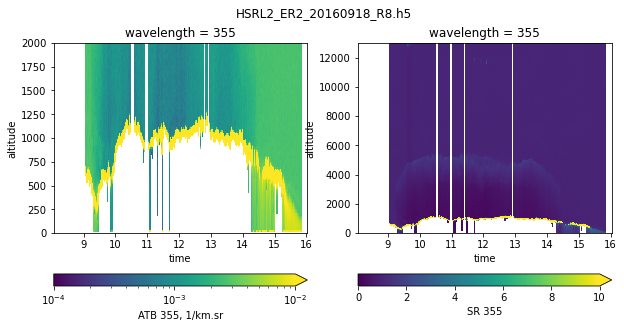

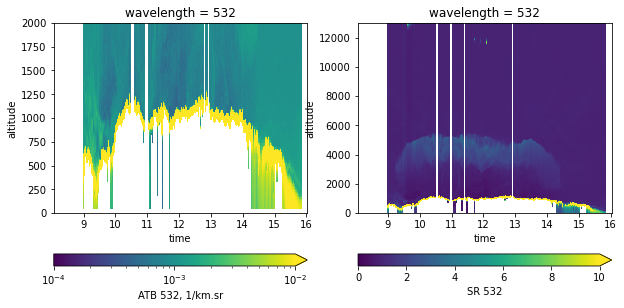

In [7]:
%matplotlib inline
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
atb355.plot(ax=ax[0], x='time', y='altitude', norm=LogNorm(vmin=1e-4, vmax=1e-2), ylim=ylim,
           cbar_kwargs={'label':'ATB 355, 1/km.sr', 'orientation':'horizontal'})
sr355.plot(ax=ax[1], x='time', y='altitude', vmin=0, vmax=10, ylim=(0,13000),
           cbar_kwargs={'label':'SR 355', 'orientation':'horizontal'})
plt.suptitle(f'{er2path.name}')
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
atb532.plot(ax=ax[0], x='time', y='altitude', norm=LogNorm(vmin=1e-4, vmax=1e-2), ylim=ylim,
           cbar_kwargs={'label':'ATB 532, 1/km.sr', 'orientation':'horizontal'})
sr532.plot(ax=ax[1], x='time', y='altitude', vmin=0, vmax=10, ylim=(0,13000),
           cbar_kwargs={'label':'SR 532', 'orientation':'horizontal'})

In [283]:
# %matplotlib inline
# profil_id = find_nearest_index(data.time.values, 9.94)
# cloud_top_height = xr.open_dataset(Path(ER2_DIR, er2path.name), group='DataProducts')['cloud_top_height']
# cloud_top_height = cloud_top_height.values.flatten()
# ylim = (-100, 13000)

# fig, ax = plt.subplots(ncols=2, figsize=(10,5))
# atb532.isel(time=profil_id).plot(y='altitude', ylim=ylim, ax=ax[0], label='532nm', xscale='log', color='g')
# atb355.isel(time=profil_id).plot(y='altitude', ylim=ylim, ax=ax[0], label='355nm', xscale='log', color='b')
# ax[0].legend(loc='best')
# ax[0].set(xlabel='ATB, 1/km.sr', title=' ')
# ax[0].axhline(cloud_top_height[profil_id], color='k')
# sr532.isel(time=profil_id).plot(y='altitude', ylim=ylim, ax=ax[1], label='532nm', color='g')
# sr355.isel(time=profil_id).plot(y='altitude', ylim=ylim, ax=ax[1], label='355nm', color='b')
# ax[1].legend(loc='best')
# ax[1].set(xlabel='SR', title=' ')
# plt.suptitle(f'time={data.time.values[profil_id]}')

# profil_id = find_nearest_index(data.time.values, 10.82)
# fig, ax = plt.subplots(ncols=2, figsize=(10,5))
# atb532.isel(time=profil_id).plot(y='altitude', ylim=ylim, xlim=(0, 10), ax=ax[0], label='532nm', xscale='log', color='g')
# atb355.isel(time=profil_id).plot(y='altitude', ylim=ylim, xlim=(0, 10), ax=ax[0], label='355nm', xscale='log', color='b')
# ax[0].legend(loc='best')
# ax[0].set(xlabel='ATB, 1/km.sr', title=' ')
# ax[0].axhline(cloud_top_height[profil_id], color='k')
# sr532.isel(time=profil_id).plot(y='altitude', ylim=ylim, xlim=(0, 10), ax=ax[1], label='532nm', color='g')
# sr355.isel(time=profil_id).plot(y='altitude', ylim=ylim, xlim=(0, 10), ax=ax[1], label='355nm', color='b')
# ax[1].legend(loc='best')
# ax[1].set(xlabel='SR', title=' ')
# plt.suptitle(f'time={data.time.values[profil_id]}')

In [184]:
# xlim = (9,11)
# %matplotlib inline
# fig, (ax, ax2)=plt.subplots(ncols=2, figsize=(11,5))
# pcm=ax.pcolormesh(data.time.values, data.altitude.values, ext532.T, vmin=0, vmax=0.2, cmap='RdPu')
# ax.scatter(data.time.values, cloud_top_height, marker='.', color='r')
# plt.colorbar(pcm, ax=ax)
# ax.set_xlim(xlim)
# ax.set_ylim(-10,2000)

# pcm=ax2.pcolormesh(data.time.values, data.altitude.values, sr532.T, vmin=0, vmax=10)
# ax2.scatter(data.time.values, cloud_top_height, marker='.', color='r')
# plt.colorbar(pcm, ax=ax2)
# ax2.set_xlim(xlim)
# ax2.set_ylim(-10,2000)

<IPython.core.display.Javascript object>


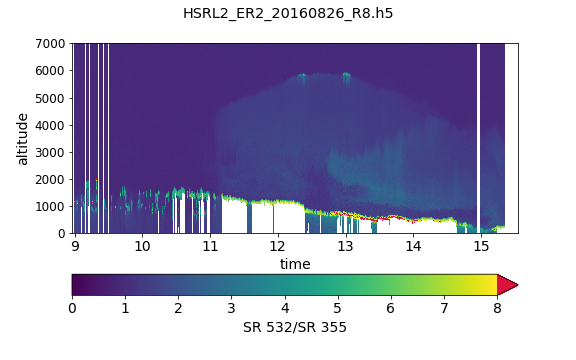

Text(0.5, 0.98, 'HSRL2_ER2_20160826_R8.h5')

In [221]:
%matplotlib notebook
ylim = (0,7000)
fig, ax = plt.subplots(ncols=1, figsize=(8,5))
(sr532/sr355).plot(ax=ax, x='time', y='altitude', vmin=0, vmax=8, ylim=ylim,
           cbar_kwargs={'label':'SR 532/SR 355', 'orientation':'horizontal'})
plt.suptitle(f'{er2path.name}')

In [67]:
tmp1 = [find_nearest_index(data.time.values, t) for t in [9.41, 10.7, 11.8, 14.44, 15.02]]
tmp1 = np.where((data.time.values >12.4)&(data.time.values<13.0))[0]
tmp2 = np.where((data.time.values >10)&(data.time.values<14))[0]

In [76]:
ls_ext532integ = []
ls_ext355integ = []
# for t in range(len(cloud_top_height)):
#     ext532integ = 0
#     if np.isnan(cloud_top_height[t]):
#         ext532integ=np.nan
#     else:
for t in tmp1:
    ext532integ = 0
    ext355integ = 0
    for z in range(data.altitude.values.shape[0]):
        ext532integ = np.nansum([ext532integ, ext532[t, z]*1e-3*(data.altitude.values[z] - data.altitude.values[z-1])])
        ext355integ = np.nansum([ext355integ, ext355[t, z]*1e-3*(data.altitude.values[z] - data.altitude.values[z-1])])
    ls_ext532integ.append(ext532integ)
    ls_ext355integ.append(ext355integ)

In [77]:
# print(ls_ext532integ, data.time.values[tmp1])
# print(sr532.values[[tmp1, [find_nearest_index(data.altitude.values, cloud_top_height[t]) for t in tmp1]]])
sr532_equivalent = sr532.values[tmp1, [find_nearest_index(data.altitude.values, cloud_top_height[t]) for t in tmp1]]
sr355_equivalent = sr355.values[tmp1, [find_nearest_index(data.altitude.values, cloud_top_height[t]) for t in tmp1]]

# sr532.isel(time = tmp1, altitude = [find_nearest_index(data.altitude.values, cloud_top_height[t]) for t in tmp1])

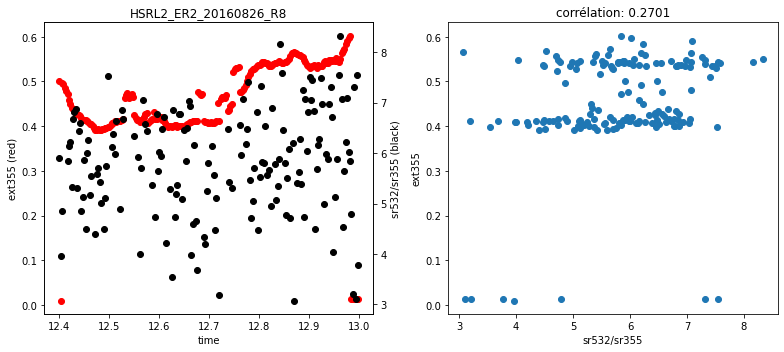

In [81]:
%matplotlib inline

fix, (ax, ax1) = plt.subplots(ncols=2, figsize=(11,5))
ax.scatter(data.time.isel(time=tmp1).values, ls_ext355integ, color='r')
ax.set(xlabel= 'time', ylabel= 'ext355 (red)', title=f'{er2path.stem}')
ax2 = ax.twinx()
ax2.scatter(data.time.isel(time=tmp1).values, sr532_equivalent/sr355_equivalent, color='k')
ax2.set(ylabel= 'sr532/sr355 (black)')

from scipy.stats import pearsonr
corre_value = pearsonr((sr532_equivalent/sr355_equivalent)[~np.isnan(sr532_equivalent/sr355_equivalent)&~np.isnan(ls_ext355integ)], 
                       np.array(ls_ext355integ)[~np.isnan(sr532_equivalent/sr355_equivalent)&~np.isnan(ls_ext355integ)])[0]
ax1.set(xlabel= 'sr532/sr355', ylabel= 'ext355', title = f'corrélation: {round(corre_value,4)}')
ax1.scatter(sr532_equivalent/sr355_equivalent, ls_ext355integ)
plt.tight_layout()

fix, (ax, ax1) = plt.subplots(ncols=2, figsize=(11,5))
ax.scatter(data.time.isel(time=tmp1).values, ls_ext355integ, color='r')
ax.set(xlabel= 'time', ylabel= 'ext355 (red)', title=f'{er2path.stem}')
ax2 = ax.twinx()
ax2.scatter(data.time.isel(time=tmp1).values, sr532_equivalent/sr355_equivalent, color='k')
ax2.set(ylabel= 'sr532/sr355 (black)')

from scipy.stats import pearsonr
corre_value = pearsonr((sr532_equivalent/sr355_equivalent)[~np.isnan(sr532_equivalent/sr355_equivalent)&~np.isnan(ls_ext355integ)], 
                       np.array(ls_ext355integ)[~np.isnan(sr532_equivalent/sr355_equivalent)&~np.isnan(ls_ext355integ)])[0]
ax1.set(xlabel= 'sr532/sr355', ylabel= 'ext355', title = f'corrélation: {round(corre_value,4)}')
ax1.scatter(sr532_equivalent/sr355_equivalent, ls_ext355integ)
plt.tight_layout()
# for t in range(len(tmp1)):
#     ax.scatter(sr532_equivalent[t]/sr355_equivalent[t], ls_ext532integ[t], label=f'{data.time.values[tmp1[t]]}')
# plt.legend()

# fig, ax1 = plt.subplots()
# pcm = ax1.pcolormesh(data.time.values, data.altitude.values, ext532.T, cmap='RdPu', vmax=0.5)
# plt.colorbar(pcm, ax=ax1)

In [15]:
def find_nearest_index(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def get_extinction_integrated(time, altitude, CloudTopHeight, extinction, sr):
    ## CALCULER ALL PROFILS D'EXTINCTION INTÉGRÉE ET SES VALEURS SR532/SR355 CORRESPONDANTES
    '''
    Intégrer le signal avec limitre entre 7km et CTH 
    ! chaque profil 1 CTH ou Nan 
    '''

    id_cth = [find_nearest_index(altitude, cth) for cth in CloudTopHeight]
    id_limite = find_nearest_index(altitude, 7000)

    # quand CTH = 0 
    ls_ext_integ = np.zeros((len(time)))#np.zeros((np.isnan(cloud_top_height.flatten()).sum()))
    for z in range(1, id_limite):
        tmp = extinction[np.isnan(CloudTopHeight.flatten()), z]*1e-3*(altitude[z] - altitude[z-1])
        ls_ext_integ[np.isnan(CloudTopHeight.flatten())] = np.nansum([ls_ext_integ[np.isnan(CloudTopHeight.flatten())], tmp], axis=0)

    # quand CTH != 0 
    for i in np.where(~np.isnan(CloudTopHeight.flatten()))[0]:
        for z in range(id_cth[i], id_limite):
            tmp = extinction[i, z]*1e-3*(altitude[z] - altitude[z-1])
            ls_ext_integ[i] = np.nansum([ls_ext_integ[i], tmp], axis=0)
            
    print(np.setdiff1d(np.where(ls_ext_integ==0.0), np.where(np.isnan(extinction[:,:id_limite]).all(axis=1))))
#     print(extinction[np.setdiff1d(np.where(ls_ext_integ==0.0), np.where(np.isnan(extinction).all(axis=1)))])
    ls_ext_integ[np.isnan(extinction[:,:id_limite]).all(axis=1)] = np.nan
    ls_tau_integ = np.exp(-2*ls_ext_integ) 
    
    sr_equivalent = np.array([sr[t, find_nearest_index(altitude, CloudTopHeight[t])] for t in range(CloudTopHeight.shape[0])])
    sr_equivalent[np.isnan(CloudTopHeight.flatten())] = np.nan
#     print(np.union1d(np.where(~np.isnan(extinction).all(axis=1)), np.where(~np.isnan(CloudTopHeight.flatten()))))
#     id_notNan = np.union1d(np.where(~np.isnan(extinction).all(axis=1)), np.where(~np.isnan(CloudTopHeight.flatten())))
#     ls_ext_integ = ls_ext_integ[id_notNan]
#     sr_equivalent = sr_equivalent[id_notNan]
#     time = time[id_notNan]
    return ls_ext_integ, sr_equivalent


In [74]:
'''
calculer l'extinction intégrée de 532nm
'''
append_ls_ext532integ = [] # pour le scatterplot
append_rapport_sr = [] # pour le scatterplot
append_ls_sr532equivalent = [] # pour le scatterplot
append_ls_sr355equivalent = [] # pour le scatterplot

# for lf in LISTFILENAMES:
    # er2path = Path(ER2CALIB_DIR, lf)
for er2path in sorted(ER2CALIB_DIR.glob('*_R8.h5'))[:4]:
    data = xr.open_dataset(er2path)
    sr355 = (data['calibrated']/data['molecular']).sel(wavelength=355)
    sr532 = (data['calibrated']/data['molecular']).sel(wavelength=532)
    atb355 = data['calibrated'].sel(wavelength=355)
    atb532 = data['calibrated'].sel(wavelength=532)
    DataProducts = xr.open_dataset(Path(ER2_DIR, er2path.name), group='DataProducts')
    cloud_top_height = DataProducts['cloud_top_height'].values.flatten()
    ext532 = DataProducts['532_ext'].values
    ext355 = DataProducts['355_ext'].values
    time = data.time.values
    altitude = data.altitude.values

    ls_ext532integ, sr532_equivalent = get_extinction_integrated(time, altitude, cloud_top_height, ext532, sr532)
    print(f'Extinction 532 integree: {np.isnan(ls_ext532integ).sum()}')
    print(f'SR equivalent: {np.isnan(sr532_equivalent).sum()}')  
    print(ls_ext532integ.shape, sr532_equivalent.shape)
    ls_ext355integ, sr355_equivalent = get_extinction_integrated(time, altitude, cloud_top_height, ext355, sr355)
    print(f'Extinction 355 integree: {ls_ext355integ}')
    print(f'SR equivalent: {sr355_equivalent}')
    
    mask = ~np.isnan(sr532_equivalent/sr355_equivalent)&~np.isnan(ls_ext532integ)&(ls_ext532integ < 0.7)
    append_ls_ext532integ.append(ls_ext532integ[mask])
    # append_ls_ext355integ.append(ls_ext355integ[~np.isnan(sr532_equivalent/sr355_equivalent)&~np.isnan(ls_ext532integ)])
    append_rapport_sr.append((sr532_equivalent/sr355_equivalent)[mask])
#     append_ls_sr532equivalent.append(sr532_equivalent[mask])
#     append_ls_sr355equivalent.append(sr355_equivalent[mask])
    
    append_ls_sr355equivalent.append(sr355[mask, :].values.flatten())
    append_ls_sr532equivalent.append(sr532[mask, :].values.flatten())
    
    
#     ext532 = ext532[mask, :]
#     sr532 = sr532[mask, :]
#     sr355 = sr355[mask, :]
#     print(np.where(ls_ext532integ[mask]<0.01))
    
#     fig, (ax, ax2) = plt.subplots(figsize=(9,7), ncols=2)
#     colortabs = ['blue', 'orange', 'green', 'purple', 'red', 'brown']
#     j=0
#     for i in np.where((ls_ext532integ[mask]<0.01))[0][:5]:
#         ax.plot(ext532[i,:], altitude, label = f'time: {time[i]}', color=colortabs[j])
#         ax2.semilogx(sr355[i,:], altitude, linestyle='--', label=f'355', color=colortabs[j])
#         ax2.semilogx(sr532[i,:], altitude, label=f'532', color=colortabs[j])
#         j=j+1
#     ax.legend(loc='lower right', title=f'{er2path.stem}')
#     ax2.legend(loc='best', title=f'{er2path.stem}')
#     ax.set(xlabel='Extinction, ls_ext532integ<0.02')
#     ax2.set(xlabel='SR, sr532_equivalent/sr355_equivalent > 5.3')
#     ax.set_ylim(0, 7000)
#     ax2.set_ylim(0, 7000)
#     plt.savefig(f'/homedata/nmpnguyen/ORACLES-ER2/Figs/ProfilsExtinctionIntegree-inf001_SR-sup53_{er2path.stem}.png')
#     plt.close()

append_ls_ext532integ = np.concatenate(append_ls_ext532integ)
# append_ls_ext355integ = np.concatenate(append_ls_ext355integ)
append_rapport_sr = np.concatenate(append_rapport_sr)
append_ls_sr532equivalent = np.concatenate(append_ls_sr532equivalent)
append_ls_sr355equivalent = np.concatenate(append_ls_sr355equivalent)    

[]
Extinction 532 integree: 961
SR equivalent: 785
(1404,) (1404,)
[]
Extinction 355 integree: [nan nan nan ... nan nan nan]
SR equivalent: [nan nan nan ... nan nan nan]
[]
Extinction 532 integree: 1048
SR equivalent: 1532
(1651,) (1651,)
[]
Extinction 355 integree: [nan nan nan ... nan nan nan]
SR equivalent: [nan nan nan ... nan nan nan]
[]
Extinction 532 integree: 135
SR equivalent: 803
(2360,) (2360,)
[]
Extinction 355 integree: [nan nan nan ... nan nan nan]
SR equivalent: [nan nan nan ... nan nan nan]
[]
Extinction 532 integree: 314
SR equivalent: 992
(2393,) (2393,)
[]
Extinction 355 integree: [nan nan nan ... nan nan nan]
SR equivalent: [nan nan nan ... nan nan nan]


In [17]:
np.where(np.isnan(append_ls_ext532integ))

(array([], dtype=int64),)

In [55]:
from scipy import stats 
count_binned, count_binned_x, count_binned_y, _ = stats.binned_statistic_2d(y=append_rapport_sr, x=append_ls_ext532integ, 
                                        values=append_ls_sr532equivalent, statistic='count', 
                                        bins=[50, 50], range=[[0.03,append_ls_ext532integ.max()],[0,10]])
mean_binned, mean_binned_x, mean_binned_y, _ = stats.binned_statistic_2d(y=append_rapport_sr, x=append_ls_ext532integ, 
                                        values=append_ls_sr532equivalent, statistic='mean', 
                                        bins=[50, 50], range=[[0.03,append_ls_ext532integ.max()],[0,10]])
std_binned, std_binned_x, std_binned_y, _ = stats.binned_statistic_2d(y=append_rapport_sr, x=append_ls_ext532integ, 
                                        values=append_ls_sr532equivalent, statistic='std', 
                                        bins=[50, 50], range=[[0.03,append_ls_ext532integ.max()],[0,10]])

std_binned[np.isnan(mean_binned)] = np.nan
count_binned[np.isnan(mean_binned)] = np.nan
# corre_value = pearsonr(append_rapport_sr, append_ls_ext532integ)[0]


In [56]:
len(append_ls_sr532equivalent[~np.isnan(append_ls_sr532equivalent)])

2826

<ipython-input-57-f604f5b97c0b>:8: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Spectral_r"))
  cmap2.set_under('lightgrey')
<ipython-input-57-f604f5b97c0b>:9: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Spectral_r"))
  cmap2.set_over("dimgrey")


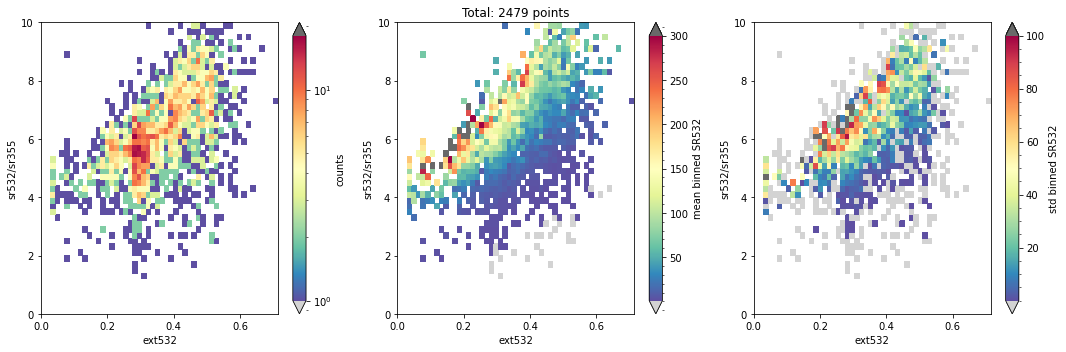

In [57]:
import matplotlib.colors as mcolors

fig, (ax, ax1, ax2) = plt.subplots(ncols = 3, figsize=(15,5))
ax.set(ylabel= 'sr532/sr355', xlabel= 'ext532')
ax1.set(ylabel= 'sr532/sr355', xlabel= 'ext532', title = f'Total: {np.nansum(count_binned).astype("int")} points')
ax2.set(ylabel= 'sr532/sr355', xlabel= 'ext532')
cmap2= plt.cm.Spectral_r #mcolors.ListedColormap(colors_colorbar)
cmap2.set_under('lightgrey')
cmap2.set_over("dimgrey")

# norm= mcolors.Normalize(vmin=0,vmax=100)
# pcm = ax.hist2d(append_rapport_sr, append_ls_ext532integ,
#           bins=50, range=[[0,10],[0, append_ls_ext532integ.max()]], shading='auto', norm=norm, cmap='turbo')
pcm = ax.pcolormesh(count_binned_x, count_binned_y, count_binned.T, cmap=cmap2, norm=LogNorm(vmin=1))
cb = plt.colorbar(pcm, ax=ax, label='counts', extend='both')
ax.set_xlim(0, append_ls_ext532integ.max())
ax.set_ylim(0, 10)
cb.ax.minorticks_on()

pcm1 = ax1.pcolormesh(mean_binned_x, mean_binned_y, mean_binned.T, cmap=cmap2, vmin=1,vmax=300)
cb1 = plt.colorbar(pcm1, ax=ax1, extend='both', label='mean binned SR532')
ax1.set_ylim(0, 10)
ax1.set_xlim(0, append_ls_ext532integ.max())
cb1.ax.minorticks_on()

norm2= mcolors.Normalize(vmin=1e-2,vmax=100)
pcm2 = ax2.pcolormesh(std_binned_x, std_binned_y, std_binned.T, cmap=cmap2, norm=norm2)
cb2 = plt.colorbar(pcm2, ax=ax2, extend='both', label='std binned SR532')
ax2.set_ylim(0, 10)
ax2.set_xlim(0, append_ls_ext532integ.max())
cb2.ax.minorticks_on()

plt.tight_layout()
plt.savefig(Path("/homedata/nmpnguyen/ORACLES-ER2/Figs/",f'extinction_integree_scatterplot_all_v2.png'))

[nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan]
[    294     295     296 ... 4361712 4361713 4361714] [    294     295     296 ... 4361712 4361713 4361714]
A
[ 5.89254419 -4.52750462] [[ 4.55826763e-07 -5.07376393e-07]
 [-5.07376393e-07  3.89179453e-06]]
nombre de points no-NaN: 3815298


(0.0, 80.0)

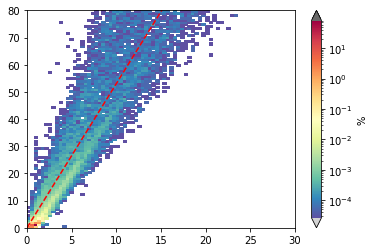

In [79]:
# mask2 = (append_ls_ext532integ < 0.7)
# meanExt_binned, mean_binned_x, mean_binned_y, _ = stats.binned_statistic_2d(y=append_ls_sr532equivalent[mask2], x=append_ls_sr355equivalent[mask2], 
#                                         values=append_ls_ext532integ[mask2], statistic='mean', 
#                                         bins=[50, 50], range=[[0,30],[0,80]])

# fig, ax = plt.subplots()
# cmap2= plt.cm.Spectral_r #mcolors.ListedColormap(colors_colorbar)
# cmap2.set_under('lightgrey')
# cmap2.set_over("dimgrey")

# pcm = ax.pcolormesh(mean_binned_x, mean_binned_y, meanExt_binned.T, cmap=cmap2, vmin=0, vmax=1)
# cb = plt.colorbar(pcm, ax=ax, extend='both', label='mean binned Ext_interated_532')

print(append_ls_sr355equivalent, sr355[mask, :].values.flatten())
Xx, Yy, histoSRvsExt, _ = get_params_histogram([[0,40], [0,80]], append_ls_sr355equivalent, append_ls_sr532equivalent)
fig, ax = plt.subplots()
pcm = ax.pcolormesh(Xx, Yy, histoSRvsExt.T, norm=LogNorm(), cmap='Spectral_r')
cb = plt.colorbar(pcm, ax=ax, extend='both', label='%')
ax.plot(np.arange(0,25,5), 5.3*np.arange(0,25,5), color='r', linestyle='--')
ax.set_xlim(0, 30)
ax.set_ylim(0, 80)

In [72]:
## CALCULER ALL PROFILS D'EXTINCTION INTÉGRÉE ET SES VALEURS SR532/SR355 CORRESPONDANTES

ls_ext532integ = np.zeros((len(data.time.values)))
ls_ext355integ = np.zeros((len(data.time.values)))
print(ls_ext532integ.shape)

'''
Intégrer le signal sans limite l'altitude
'''

for z in range(1, data.altitude.values.shape[0]):
    tmp = ext532[:, z]*1e-3*(data.altitude.values[z] - data.altitude.values[z-1])
    ls_ext532integ = np.nansum([ls_ext532integ, tmp], axis=0)
    tmp = ext355[:, z]*1e-3*(data.altitude.values[z] - data.altitude.values[z-1])
    ls_ext355integ = np.nansum([ls_ext355integ, tmp], axis=0)

ls_tau532integ = np.exp(-2*ls_ext532integ) 
ls_tau355integ = np.exp(-2*ls_ext355integ) 
sr532_equivalent = [sr532[t, find_nearest_index(data.altitude.values, cloud_top_height[t])] for t in range(cloud_top_height.shape[0])]
# sr532.values[:,[find_nearest_index(data.altitude.values, cth) for cth in cloud_top_height]]
sr355_equivalent = [sr355[t, find_nearest_index(data.altitude.values, cloud_top_height[t])] for t in range(cloud_top_height.shape[0])]


(2360,)


In [193]:
ls_tau532integ = np.exp(-2*ls_ext532integ) 
ls_tau355integ = np.exp(-2*ls_ext355integ) 
sr532_equivalent = np.array([sr532[t, find_nearest_index(data.altitude.values, cloud_top_height[t])] for t in range(cloud_top_height.shape[0])])
# sr532.values[:,[find_nearest_index(data.altitude.values, cth) for cth in cloud_top_height]]
sr355_equivalent = np.array([sr355[t, find_nearest_index(data.altitude.values, cloud_top_height[t])] for t in range(cloud_top_height.shape[0])])


<ipython-input-240-a4379055da6b>:30: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("turbo"))
  cmap.set_under("white")
<ipython-input-240-a4379055da6b>:68: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap1.set_over("crimson")


(0.0, 10.0)

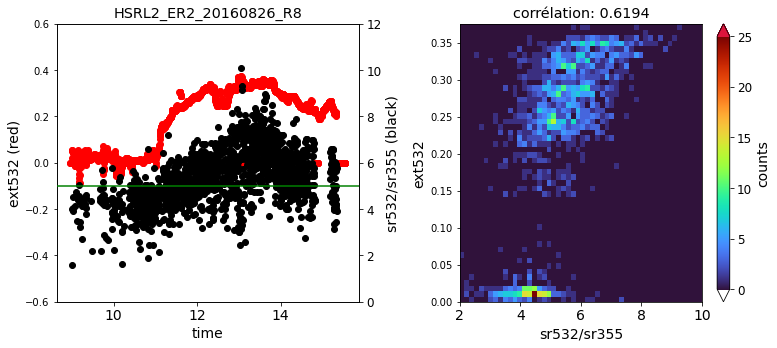

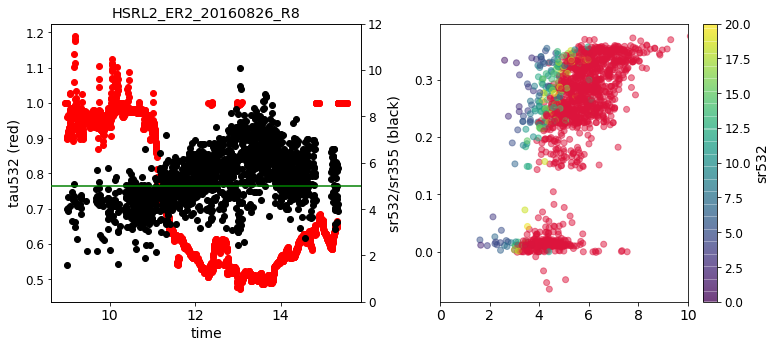

In [240]:
%matplotlib inline
import matplotlib.colors as mcolors

'''
532 nm 
'''
fix, (ax, ax1) = plt.subplots(ncols=2, figsize=(11,5))
plt.rcParams['font.size']=12
# Set the axes labels font size
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)

ax.scatter(data.time.values, ls_ext532integ, color='r')
# ax.plot(data.time.values, DataProducts['355_AOT_above_cloud'].values, color='g')
ax.set(xlabel= 'time', ylabel= 'ext532 (red)', title=f'{er2path.stem}')
ax.set_ylim(-0.6, 0.6)
ax2 = ax.twinx()
ax2.scatter(data.time.values, sr532_equivalent/sr355_equivalent, color='k')
ax2.set(ylabel= 'sr532/sr355 (black)')
ax2.set_ylim(0,12)
ax2.axhline(5, color='g', zorder=10)

from scipy.stats import pearsonr
corre_value = pearsonr((sr532_equivalent/sr355_equivalent)[~np.isnan(sr532_equivalent/sr355_equivalent)&~np.isnan(ls_ext532integ)], 
                       np.array(ls_ext532integ)[~np.isnan(sr532_equivalent/sr355_equivalent)&~np.isnan(ls_ext532integ)])[0]
ticks_colorbar = np.arange(0,25,2)
colors_colorbar = ["#48a2ba", "#eaa941", "#efef39", "#53a447", "#3b387f"]
cmap= plt.cm.turbo #mcolors.ListedColormap(colors_colorbar)
# cmap.set_over("crimson")
cmap.set_under("white")
norm= mcolors.Normalize(vmin=0,vmax=25)

ax1.set(xlabel= 'sr532/sr355', ylabel= 'ext532', title = f'corrélation: {round(corre_value,4)}')
# ax1.scatter(np.array(sr532_equivalent)/np.array(sr355_equivalent), ls_ext532integ)
pcm = ax1.hist2d((sr532_equivalent/sr355_equivalent)[~np.isnan(sr532_equivalent/sr355_equivalent)&~np.isnan(ls_ext532integ)],
          np.array(ls_ext532integ)[~np.isnan(sr532_equivalent/sr355_equivalent)&~np.isnan(ls_ext532integ)],
          bins=50, range=[[2,10],[0,ls_ext532integ.max()]], cmap=cmap, shading='auto', norm=norm)
plt.colorbar(pcm[3], ax=ax1, label='counts', extend="both")
plt.tight_layout()
ax1.set_ylim(0, ls_ext532integ.max())
ax1.set_xlim(2, 10)



<IPython.core.display.Javascript object>


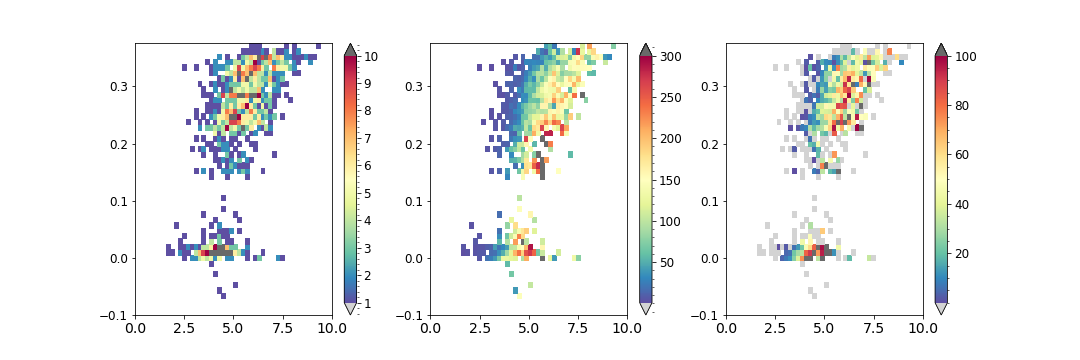

<ipython-input-370-259c4a51bbcd>:19: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Spectral_r"))
  cmap2.set_under('lightgrey')
<ipython-input-370-259c4a51bbcd>:20: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Spectral_r"))
  cmap2.set_over("dimgrey")


In [370]:
from scipy import stats 
mean_binned, mean_binned_x, mean_binned_y, _ = stats.binned_statistic_2d(x=(sr532_equivalent/sr355_equivalent), y=ls_ext532integ, 
                                        values=sr532_equivalent, statistic='mean', 
                                        bins=[50, 50], range=[[0,10],[-0.1,ls_ext532integ.max()]])
std_binned, std_binned_x, std_binned_y, std_binnumb = stats.binned_statistic_2d(x=(sr532_equivalent/sr355_equivalent), y=ls_ext532integ, 
                                        values=sr532_equivalent, statistic='std' , expand_binnumbers=True,
                                        bins=[50, 50], range=[[0,10],[-0.1,ls_ext532integ.max()]])

count_binned, count_binned_x, count_binned_y, _ = stats.binned_statistic_2d(x=(sr532_equivalent/sr355_equivalent), y=ls_ext532integ, 
                                        values=sr532_equivalent, statistic='count', 
                                        bins=[50, 50], range=[[0,10],[-0.1,ls_ext532integ.max()]])

std_binned[np.isnan(mean_binned)] = np.nan
count_binned[np.isnan(mean_binned)] = np.nan

%matplotlib notebook
fig, (ax, ax1, ax2) = plt.subplots(ncols=3, figsize=(15,5))
cmap2= plt.cm.Spectral_r #mcolors.ListedColormap(colors_colorbar)
cmap2.set_under('lightgrey')
cmap2.set_over("dimgrey")

pcm = ax.pcolormesh(count_binned_x, count_binned_y, count_binned.T, cmap=cmap2, vmin=1,vmax=10)
cb = plt.colorbar(pcm, ax=ax, extend='both')
cb.ax.minorticks_on()

pcm1 = ax1.pcolormesh(mean_binned_x, mean_binned_y, mean_binned.T, cmap=cmap2, vmin=1,vmax=300)
cb1 = plt.colorbar(pcm1, ax=ax1, extend='both')
cb1.ax.minorticks_on()

norm= mcolors.Normalize(vmin=1e-2,vmax=100)
pcm2 = ax2.pcolormesh(std_binned_x, std_binned_y, std_binned.T, cmap=cmap2, norm=norm)
cb2 = plt.colorbar(pcm2, ax=ax2, extend='both')
cb2.ax.minorticks_on()

In [365]:
# print(count_binned[:25,:])
# print(mean_binned[:25,:])
print(find_nearest_index(std_binned_x, 6.047), find_nearest_index(std_binned_y, 0.296))

print(f'mean{mean_binned[25,:]}, counts{count_binned[25,:]},std{std_binned[25,:]}')

print('where',np.where(std_binnumb==25))

25 39
mean[         nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
  94.29499396 232.64931869          nan 315.2927783  251.01493347
          nan 232.33039089 105.79965428 123.67058499 175.08145558
  30.53050756 110.77676477 194.27481153 125.67961101 158.47473538
  95.92426703 198.27335625 130.3774551  126.92722212 102.72771865
  83.91471873  48.09103448  61.27551522          nan  57.54553661], counts[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 4. 3. 3. 3. 2. 2. 5. 8. 4. 3. 4. 2. 4. 7. 3. 8. 1.
 0. 1.],std[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan       

(array([ 1.,  3.,  9.,  6., 18.,  7.,  6.,  8.,  9., 11.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

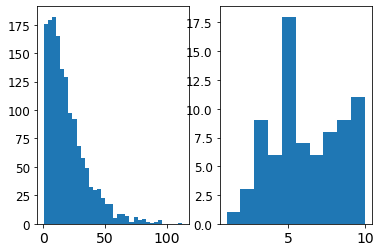

In [230]:
fig, (ax,ax1) = plt.subplots(ncols = 2)
ax.hist(sr355_equivalent, bins='auto')
ax1.hist(sr532_equivalent, range=[1,10])

(2360, 1)


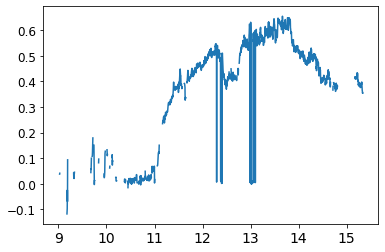

In [226]:
print(DataProducts['355_AOT_above_cloud'].values.shape)
fig, ax = plt.subplots()
ax.plot(data.time.values, DataProducts['355_AOT_above_cloud'].values)

/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160819_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160823_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160826_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160912_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160916_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160918_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160920_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160922_R8.h5
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160924_R8.h5


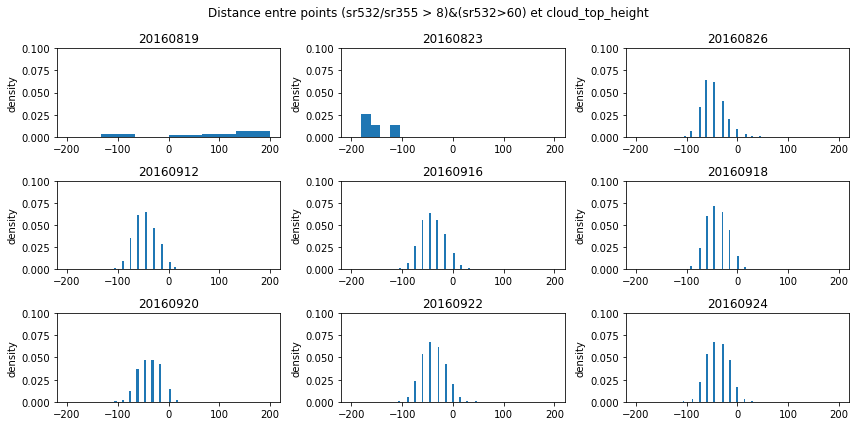

In [44]:
## retrouver la proportionnalité des profils ayant CTH dans un cas de jour. 

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12,6))
for er2path, (i,ax2) in zip(sorted(Path('/homedata/nmpnguyen/ORACLES-ER2/').glob('*_R8.h5')), enumerate(axes.flat)):
    print(er2path)
    DataProducts = xr.open_dataset(er2path, group='DataProducts')
    cloud_top_height = DataProducts['cloud_top_height'].values
    data_above = xr.open_dataset(Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/', er2path.name))
    sr_above = data_above['calibrated']/data_above['molecular']
    sr355 = sr_above.sel(wavelength=355).values
    sr532 = sr_above.sel(wavelength=532).values
  
    mat_distance = np.tile(DataProducts['Altitude'].values.flatten(), (sr355.shape[0],1)) - cloud_top_height.reshape(-1,1)
    array_distance_aftermask = mat_distance[(sr532/sr355 > 7)&(sr532>60)]
    h = ax2.hist(array_distance_aftermask[~np.isnan(array_distance_aftermask)], bins='auto', range=[-200,200], density=True)
    ax2. set(ylabel = 'density', title=['20160819', '20160823', '20160826', '20160912', '20160916', '20160918', '20160920', '20160922', '20160924'][i])
    ax2.set_ylim(0, 0.1)
# plt.xticks(np.arange(9),
#            ('20160819', '20160823', '20160826', '20160912', '20160916', '20160918', '20160920', '20160922', '20160924'),
#           rotation=60)
# ax.set(xlabel='jour', ylabel='fraction entre nb profils ayant cloud_top_height \net nb profils fort SR532/SR355',
#       title='quand (sr532/sr355 > 8)&(sr532>60)')

plt.suptitle('Distance entre points (sr532/sr355 > 8)&(sr532>60) et cloud_top_height')
plt.tight_layout()

**distance = altitude points - cloud_top_height**

_Si la distance > 0, ces points sont au-dessus de nuages du profil._ 

_Si la distance < 0, ces points sont probablement à l'intérieur du nuage._ 

La plupart des cas d'histogramme montre que les points ayant (SR532/SR355 > 7) & (SR532 > 60) sont probablement causés lors le signal rentre dans le nuage. 

Donc essayer à enlever les points sous l'altitude de nuages avant de créer la distribution de SR532/SR355 (en gardant tous les points d'un profil sans nuage). 

In [30]:
from matplotlib.colors import LogNorm 

ER2_PATH = Path('/homedata/nmpnguyen/ORACLES-ER2/')
ER2_LISTFILES = sorted(ER2_PATH.glob('*R8.h5'))
allsr355_below = None
allsr532_below = None
data_below = None

# fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,15))
# for filepath, (i,ax) in zip(ER2_LISTFILES, enumerate(axs.flat)):

for filepath in ER2_LISTFILES:
    print(filepath)
    DataProducts = xr.open_dataset(filepath, group='DataProducts')
    cloud_top_height = DataProducts['cloud_top_height'].values

    data_below = xr.open_dataset(Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/', filepath.name))
       
    mask_cth= np.zeros_like(data_below['calibrated'].sel(wavelength=355).values)
    for i, cth in enumerate(cloud_top_height):
        if np.isnan(cth):
#             pass
            mask_cth[i,:] = 1
        else:
            limZ = np.where(data_below['altitude'].values > cth+200)[0]
            mask_cth[i, limZ] = 1
#     data_below = get_data_AboveBelow_cloud_top_height(filepath.name, cloud_top_height, 'above')
    
    data_below.coords['mask_cth'] = (('time', 'altitude'), mask_cth)
    print(np.where(data_below['mask_cth'] == 1))
    
    sr355_below = (data_below['calibrated']/data_below['molecular']).sel(wavelength=355).where(data_below.mask_cth==1)
    sr532_below = (data_below['calibrated']/data_below['molecular']).sel(wavelength=532).where(data_below.mask_cth==1)
    sr355 = sr355_below.values
    sr532 = sr532_below.values

    if (allsr355_below is None) | (allsr532_below is None) :
        allsr355_below = sr355.ravel()
        allsr532_below = sr532.ravel()
    else: 
        allsr355_below = np.concatenate([allsr355_below, sr355.ravel()])
        allsr532_below = np.concatenate([allsr532_below, sr532.ravel()])

/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160819_R8.h5
(array([   0,    0,    0, ..., 1403, 1403, 1403]), array([   0,    1,    2, ..., 1386, 1387, 1388]))
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160823_R8.h5
(array([   0,    0,    0, ..., 1650, 1650, 1650]), array([   0,    1,    2, ..., 1388, 1389, 1390]))
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160826_R8.h5
(array([   0,    0,    0, ..., 2359, 2359, 2359]), array([   0,    1,    2, ..., 1409, 1410, 1411]))
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160912_R8.h5
(array([   0,    0,    0, ..., 2392, 2392, 2392]), array([   0,    1,    2, ..., 1398, 1399, 1400]))
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160916_R8.h5
(array([   0,    0,    0, ..., 2551, 2551, 2551]), array([   0,    1,    2, ..., 1376, 1377, 1378]))
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160918_R8.h5
(array([   0,    0,    0, ..., 2855, 2855, 2855]), array([   0,    1,    2, ..., 1349, 1350, 1351]))
/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_20160920_R

[  596049   596050   596051 ... 28674203 28674204 28674205] [  486334   486335   486336 ... 28674203 28674204 28674205]
A
[ 4.16698318 -2.92650456] [[ 3.29046885e-07 -3.18987621e-07]
 [-3.18987621e-07  3.63572970e-07]]
nombre de points no-NaN: 18990889


(-10.0, 80.0)

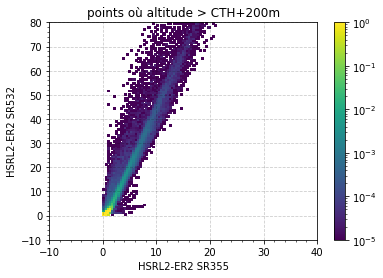

In [34]:
%matplotlib inline
from matplotlib.colors import LogNorm
Xx, Yy, histoSR, _ = get_params_histogram([[0, 40],[0, 80]], allsr355_below, allsr532_below)
fig, ax = plt.subplots()
pcm = ax.pcolormesh(Xx, Yy, histoSR.T, norm = LogNorm(vmin=1e-5, vmax=1e0))
plt.colorbar(pcm, ax=ax)
plt.minorticks_on()
# ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.2)
ax.grid(b=True, which='major', color='k', linestyle='--', alpha=0.2)
ax.set(ylabel='HSRL2-ER2 SR532', xlabel='HSRL2-ER2 SR355', title='points où altitude > CTH+200m')
ax.set_xlim(-10,40)
ax.set_ylim(-10,80)

### 3.

1404 1404
1651 1651
2360 2360
2393 2393
2552 2552
2856 2856
2479 2479
2529 2529
2670 2670


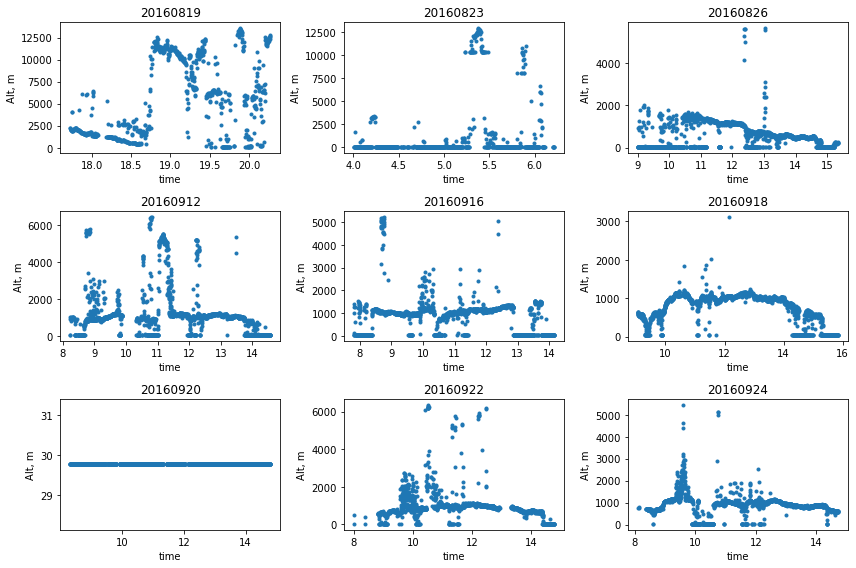

In [96]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12,8))
for er2path, (i, ax) in zip(sorted(ER2_DIR.glob('*_R8.h5')), enumerate(axes.flat)):
    DataProducts = xr.open_dataset(er2path, group='DataProducts')
    Nav_Data = xr.open_dataset(er2path, group='Nav_Data')
    gps_time = Nav_Data['gps_time'].values.ravel()
    Altitude = DataProducts['Altitude'].values.ravel()
    
    ls_epaisseur_attn = []
    for k in range(gps_time.shape[0]):
        if all(np.isnan(DataProducts['355_total_attn_bsc'].values[k,:])):
            ls_epaisseur_attn.append(np.nan)
        else:
            idalt = (np.where(~np.isnan(DataProducts['355_total_attn_bsc'].values[k,:]))[0][0])
    #         print(Altitude[idalt])
            ls_epaisseur_attn.append(Altitude[idalt])
        
    print(len(ls_epaisseur_attn), gps_time.shape[0])
    ax.scatter(gps_time, ls_epaisseur_attn, marker='.')
    ax.set(ylabel='Alt, m', xlabel='time', 
           title=['20160819', '20160823', '20160826', '20160912', '20160916', '20160918', '20160920', '20160922', '20160924'][i])
    
plt.tight_layout()

(array([616.,  10.,  53., 596., 701., 107.,   8.,   8.,   8.,   9.,   3.,
          4.,   0.,   0.,   2.,   1.,   0.,   5.,   7.,  13.]),
 array([  29.7712 ,  289.84076,  549.91032,  809.97988, 1070.04944,
        1330.119  , 1590.18856, 1850.25812, 2110.32768, 2370.39724,
        2630.4668 , 2890.53636, 3150.60592, 3410.67548, 3670.74504,
        3930.8146 , 4190.88416, 4450.95372, 4711.02328, 4971.09284,
        5231.1624 ]),
 <BarContainer object of 20 artists>)

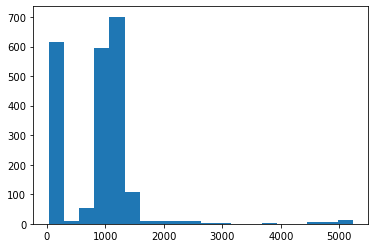

In [89]:
fig, axhist = plt.subplots()
axhist.hist(ls_epaisseur_attn, bins=20)

Vérifier l'altitude des aérosols et des nuages. 

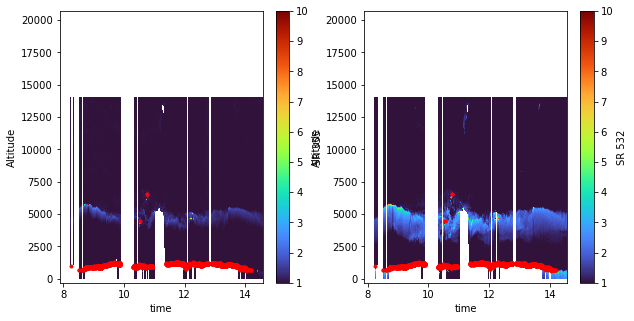

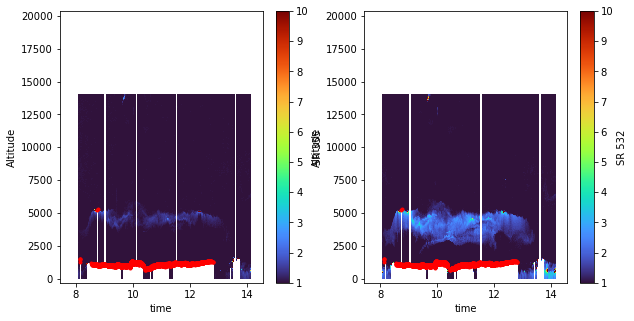

In [73]:
for er2path in sorted(ER2_DIR.glob('*_R8.h5'))[3:5]:
    DataProducts = xr.open_dataset(er2path, group='DataProducts')
    Nav_Data = xr.open_dataset(er2path, group='Nav_Data')
    gps_time = Nav_Data['gps_time'].values.ravel()
    Altitude = DataProducts['Altitude'].values.ravel()
    cloud_top_height = DataProducts['cloud_top_height'].values.ravel()
    
    data = xr.open_dataset(Path(ER2CALIB_DIR, er2path.name))
    sr355 = (data['calibrated']/data['molecular']).sel(wavelength=355).values
    sr532 = (data['calibrated']/data['molecular']).sel(wavelength=532).values
    index = np.where((sr532/sr355 > 7)&(sr532 > 60))
    sr_aerosols_532 = np.where(~np.isnan(DataProducts['532_AOT_hi_col'].values), sr532, np.nan)
    sr_aerosols_355 = np.where(~np.isnan(DataProducts['355_AOT_hi_col'].values), sr355, np.nan)
    
    fig, axs = plt.subplots(ncols=2, figsize=(10,5))
    plt.rcParams['pcolor.shading']='auto'
#     axs[0].plot(gps_time, DataProducts['355_AOT_hi'].values, label='355 AOT', color='b')
#     axs[0].plot(gps_time, DataProducts['532_AOT_hi'].values, label='532 AOT', color='g')
# #     axs[0].scatter(gps_time, cloud_top_height, marker='.', color='r')
#     axs[0].set(xlabel='time', ylabel='Total Opt Thickness, m', title=f'{er2path.stem}')
#     axs[0].legend(loc='best')

    axs[0].scatter(gps_time[index[0]], Altitude[index[1]], marker='.', color='r', zorder=10)
    pc = axs[0].pcolormesh(gps_time, Altitude, sr_aerosols_355.T, cmap='turbo', vmax=10, vmin=1)
    axs[0].set(xlabel='time', ylabel='Altitude')
    plt.colorbar(pc, ax=axs[0], orientation='vertical', label='SR 355')
    axs[1].set_xlim(gps_time[0], gps_time[-1])
    
    axs[1].scatter(gps_time[index[0]], Altitude[index[1]], marker='.', color='r', zorder=10)
    pc = axs[1].pcolormesh(gps_time, Altitude, sr_aerosols_532.T, cmap='turbo', vmax=10, vmin=1)
    axs[1].set(xlabel='time', ylabel='Altitude')
    plt.colorbar(pc, ax=axs[1], orientation='vertical', label='SR 532')
    axs[1].set_xlim(gps_time[0], gps_time[-1])    
#     pc = axs[2].pcolormesh(gps_time, Altitude/1e3, DataProducts['355_AOT_hi_col'].values.T, cmap='GnBu', vmin=0, vmax=1.0)
#     axs[2].set(xlabel='time', ylabel='Altitude')
#     plt.colorbar(pc, ax=axs[2], orientation='vertical', label='Cumulative 532_AOT')
#     axs[2].set_xlim(gps_time[0], gps_time[-1])

In [52]:
mat_alt = np.tile(DataProducts['Altitude'].values.flatten(), (sr355.shape[0],1))
mat_aerosols = np.where(~np.isnan(DataProducts['532_AOT_hi_col'].values), mat_alt, np.nan)

In [48]:
np.tile(DataProducts['Altitude'].values.flatten(), (sr355.shape[0],1))[~np.isnan(DataProducts['532_AOT_hi_col'].values)]

array([  734.2824,   749.272 ,   764.2616, ..., 13940.12  , 13955.1096,
       13970.0992])

In [15]:
def get_altitude_attenuated_ER2(data):
    '''
    input : data on xarray data
    output : altitude attenuated of these profiles on this data 
    '''
    alt_before = data['altitude'].values
    # get rows haved all NaN on x-shape and y-shape
    #----------------------------------------------
    idx = np.where(~(np.isnan(data).all(axis=1)))[0]
    data = data.isel(time=idx)
    idy = np.where(~(np.isnan(data).all(axis=0)))[0]
#     idy = idy[:-20] #remove top of atmosphère
    data = data.isel(altitude=idy)
    # get atltiude after filter NaN values
    #-------------------------------------
    idz = None; alt_attn=[]    
    alt_after = alt_before[idy]
    for i in range(data.values.shape[0]):
        if len(np.where(np.isnan(data.values[i,:]))[0])==0:
            idz = np.nan #final.append(np.nan)
            alt_attn.append(np.nan)
        else:
            idz = np.where(np.isnan(data.values[i,:]))[0][-1] #final.append(np.where(np.isnan(a.values[i,:]))[0][-1])
            alt_attn.append(alt_after[idz.astype('int')])
    return alt_attn, data['time'].values

In [16]:
'''
Variation de l'altitude où le signal atténué complètement en fonction de Longueur d'onde
'''
ER2_LISTFILES = sorted(ER2CALIB_DIR.glob('*_R8.h5'))

In [40]:
np.unique(np.where(((allsr532[2]/allsr355[2]).values > 6) & (allsr532[2].values > 60))[0])

array([ 129,  257,  258, ..., 2281, 2282, 2283])

<IPython.core.display.Javascript object>


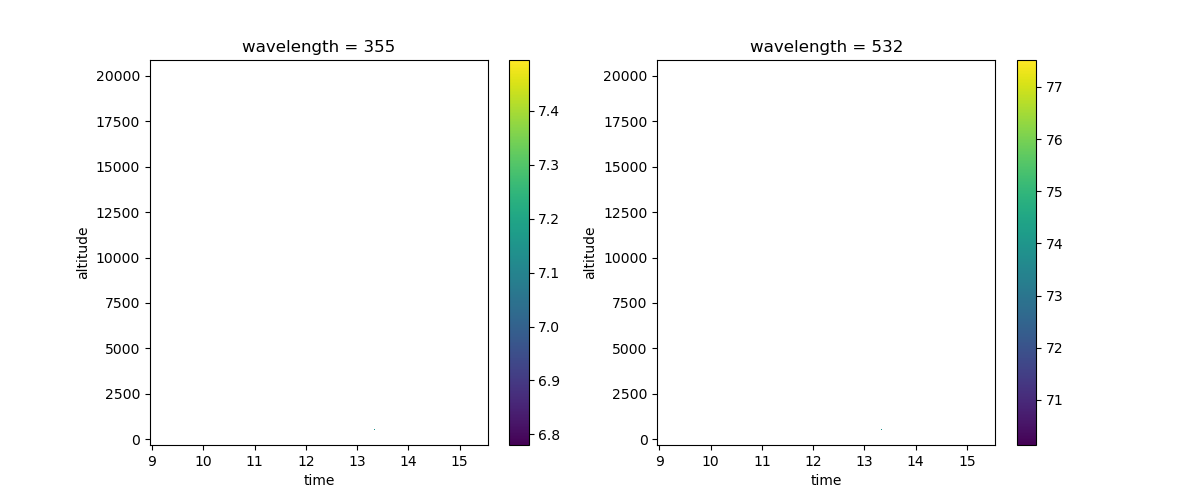

In [30]:
# data = xr.open_dataset(ER2_LISTFILES[6])
fig, (ax, ax1)= plt.subplots(ncols=2, figsize=(12,5))
# remove top of atmosphere
#-------------------------
data = allsr355[2].where((allsr355[2].bug_mask!=-1))
id_remove_atm = data['altitude'] < 17500
data_remove_atm = data.isel(altitude = id_remove_atm)
alt_attn1, time1 = get_altitude_attenuated_ER2(data_remove_atm)
data.plot(x='time', y='altitude', ax=ax) 
ax.scatter(time1, alt_attn1, color='r', marker='.')

data = allsr532[2].where((allsr532[2].bug_mask!=-1))
id_remove_atm = data['altitude'] < 17500
data_remove_atm = data.isel(altitude = id_remove_atm)
alt_attn2, time2 = get_altitude_attenuated_ER2(data_remove_atm)
data.plot(x='time', y='altitude', ax=ax1) 
ax1.scatter(time2, alt_attn2, color='r', marker='.')

<IPython.core.display.Javascript object>


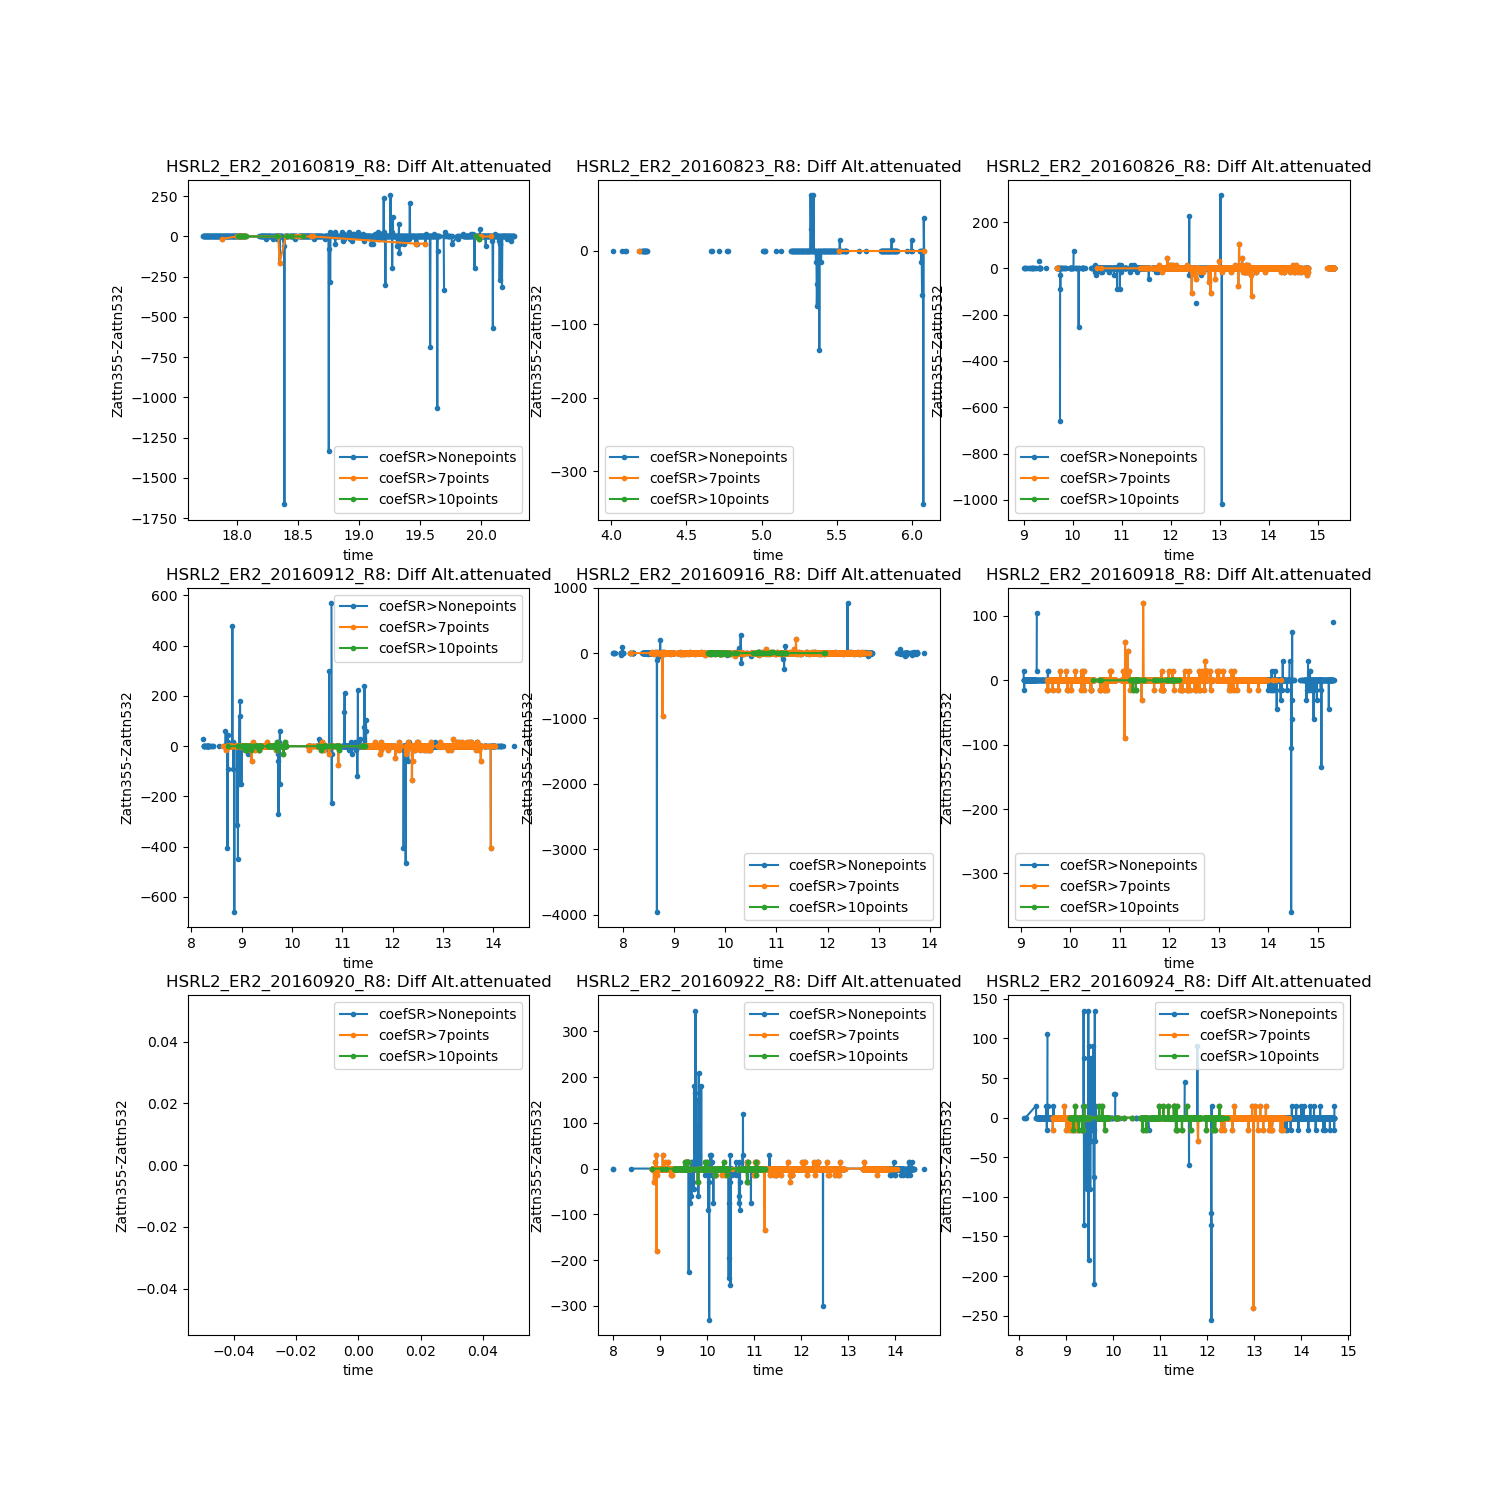

355nm (810,)
532nm (974,)
355nm (719,)
532nm (725,)
355nm (2130,)
532nm (2253,)
355nm (2013,)
532nm (2148,)
355nm (2151,)
532nm (2253,)
355nm (2225,)
532nm (2262,)
355nm (2029,)
532nm (2091,)
355nm (1894,)
532nm (2226,)
355nm (2164,)
532nm (2305,)
2.93151533932445
1.939882243569879
63.37775023241401
355nm (36,)
532nm (36,)
355nm (7,)
532nm (7,)
355nm (987,)
532nm (987,)
355nm (1106,)
532nm (1106,)
355nm (1159,)
532nm (1159,)
355nm (1388,)
532nm (1388,)
355nm (1606,)
532nm (1606,)
355nm (1266,)
532nm (1266,)
355nm (1232,)
532nm (1232,)
2.8109707522476386
1.7070672584499829
76.16934107203824
355nm (15,)
532nm (15,)
355nm (2,)
532nm (2,)
355nm (1,)
532nm (1,)
355nm (141,)
532nm (141,)
355nm (138,)
532nm (138,)
355nm (62,)
532nm (62,)
355nm (1350,)
532nm (1350,)
355nm (304,)
532nm (304,)
355nm (601,)
532nm (601,)
1.4537107880642692
1.1094108645753635
45.33282325937261


In [165]:
'''
Variation de l'altitude où le signal atténué complètement en fonction de longueur d'onde
--> Cas des profils ayant les points SR532 > 6*SR355
'''

# all_alt_attn355 = np.array([], dtype='float')
# all_alt_attn532 = np.array([], dtype='float')
coefSR = [None,7,10]
fg, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,15)) # plot each dataset in 1 DAILY plot
# fig, ax = plt.subplots() # Plot all dataset in 1 plot
# for i, ax in enumerate(axs.flat):
for coeff in coefSR:
    all_alt_attn355 = np.array([], dtype='float')
    all_alt_attn532 = np.array([], dtype='float')
    for i, ax in enumerate(axs.flat): #---------> for i in range(len(ER2_LISTFILES)):
        data = xr.open_dataset(ER2_LISTFILES[i])
        sr355 = (data['calibrated']/data['molecular']).sel(wavelength=355)
        sr532 = (data['calibrated']/data['molecular']).sel(wavelength=532)
        # filter SR532 > 6*SR355
        #-----------------------
        if (coeff is None):
            data355 = data['calibrated'].sel(wavelength=355)#allsr355[i]
            data532 = data['calibrated'].sel(wavelength=532)#allsr532[i]
        else:
            data355 = data['calibrated'].sel(wavelength=355).isel(time = np.unique(np.where(((sr532/sr355).values > coeff) & (sr532.values > 60))[0]))
            data532 = data['calibrated'].sel(wavelength=532).isel(time = np.unique(np.where(((sr532/sr355).values > coeff) & (sr532.values > 60))[0]))
        # remove top of atmosphere
        #-------------------------
        id_remove_atm = data['altitude'] < 17500
        alt_attn355, time355 = get_altitude_attenuated_ER2(data355.isel(altitude = id_remove_atm))
        print('355nm',np.array(alt_attn355).shape)
        alt_attn532, time532 = get_altitude_attenuated_ER2(data532.isel(altitude = id_remove_atm))
        print('532nm',np.array(alt_attn532).shape)
        # difference between alt attn from 355nm signal and from 53nm signal
        #-------------------------------------------------------------------
        idt = np.intersect1d(time355, time532, return_indices=True)
        all_alt_attn355 = np.concatenate([all_alt_attn355, np.array(alt_attn355)[idt[1]]], axis=0)
        all_alt_attn532 = np.concatenate([all_alt_attn532, np.array(alt_attn532)[idt[2]]], axis=0)
        # plot each dataset in 1 DAILY plot
        #----------------------------------
        diff_atl_attn =  np.array(alt_attn355)[idt[1]] - np.array(alt_attn532)[idt[2]]
        ax.plot(np.array(time355[idt[1]]), diff_atl_attn, marker='.', label=f'coefSR>{coeff}points')
        ax.legend(loc='best')
        ax.set(title=f'{ER2_LISTFILES[i].stem}: Diff Alt.attenuated', ylabel = 'Zattn355-Zattn532', xlabel='time')
    print(100*len(all_alt_attn355[(all_alt_attn355-all_alt_attn532)<0])/len(all_alt_attn355))
    print(100*len(all_alt_attn355[(all_alt_attn355-all_alt_attn532)>0])/len(all_alt_attn355))
    print(100*len(all_alt_attn355[(all_alt_attn355-all_alt_attn532)==0])/len(all_alt_attn355))
#     # PLOT ALL DATASET IN 1 PLOT
#     #---------------------------
#     ax.scatter(all_alt_attn355, all_alt_attn532, marker='.', label=f'coefSR>{coeff}; {len(all_alt_attn355)}points')

# #     allsr355[i].plot(x='time', y='altitude', ax=ax) 
# #     ax.scatter(time355, alt_attn355, color='r', marker='.')
# ax.plot([300, 17000], [300,17000], '--',color='k')
# ax.set(title='HSRL2-ER2: Altitude attenuated', ylabel = 'Zattn532', xlabel='Zattn355')
# ax.legend()
# ax.set_xlim(300,1700)
# ax.set_ylim(300,1700)

In [164]:
all_alt_attn355-all_alt_attn532

(array([1318.8768, 1273.908 , 1303.8872, ...,  989.1056,  989.1056,
        1034.0744]),
 array([1318.8768, 1273.908 , 1303.8872, ...,  989.1056,  989.1056,
        1034.0744]))

2614


<IPython.core.display.Javascript object>


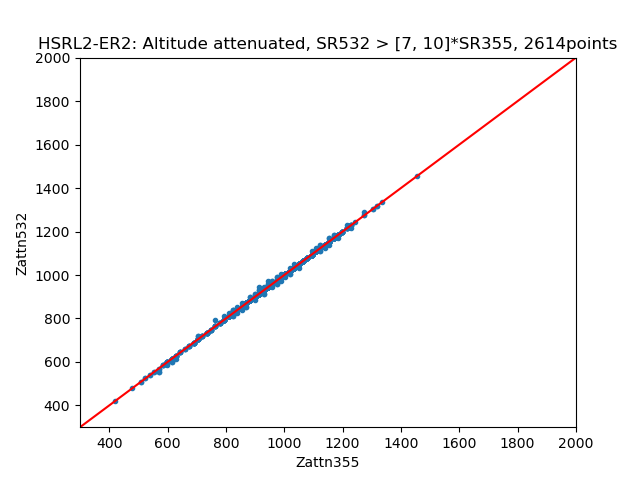

(300.0, 2000.0)

In [95]:
print(len(all_alt_attn355- all_alt_attn532))

import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
fig, ax = plt.subplots()
ax.scatter(all_alt_attn355, all_alt_attn532, marker='.', label=f'coefSR={coeff}')
ax.set(title=f'HSRL2-ER2: Altitude attenuated, SR532 > {coefSR}*SR355, {len(all_alt_attn355)}points', 
       ylabel = 'Zattn532', xlabel='Zattn355')
ax.plot([300, 17000], [300,17000], 'r')
# line = mlines.Line2D([0, 1], [0, 1], color='red')
# transform = ax.transAxes
# line.set_transform(transform)
# ax.add_line(line)
ax.set_xlim(300,2000)
ax.set_ylim(300,2000)

<IPython.core.display.Javascript object>


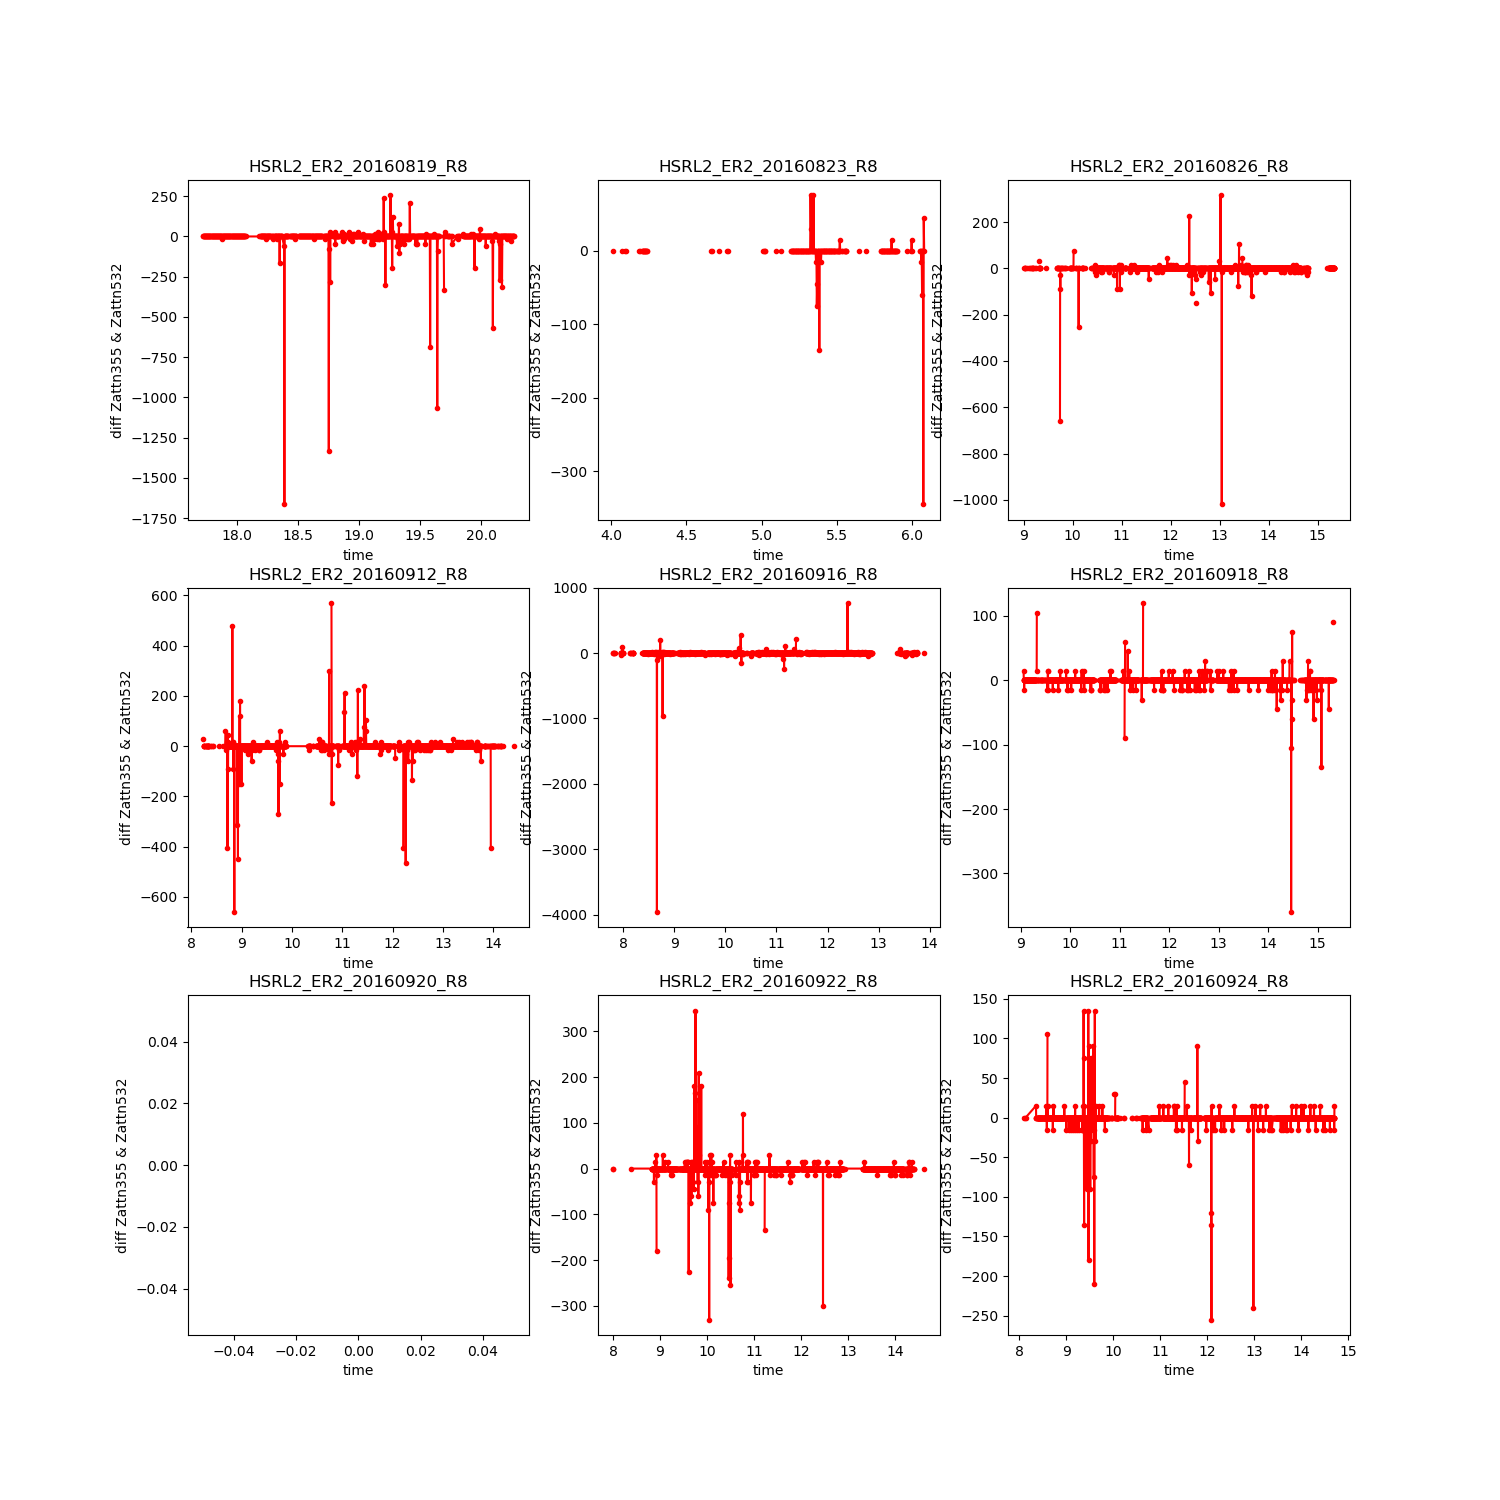

/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160819_R8.h5
355nm (810,)
532nm (974,)
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160823_R8.h5
355nm (719,)
532nm (725,)
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160826_R8.h5
355nm (2130,)
532nm (2253,)
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160912_R8.h5
355nm (2013,)
532nm (2148,)
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160916_R8.h5
355nm (2151,)
532nm (2253,)
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160918_R8.h5
355nm (2225,)
532nm (2262,)
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160920_R8.h5
355nm (2029,)
532nm (2091,)
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160922_R8.h5
355nm (1894,)
532nm (2226,)
/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_20160924_R8.h5
355nm (2164,)
532nm (2305,)


In [146]:
all_alt_attn355 = np.array([], dtype='float')
all_alt_attn532 = np.array([], dtype='float')
fg, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
for filepath, (i,ax) in zip(ER2_LISTFILES, enumerate(axs.flat)):
    print(filepath)
    data = xr.open_dataset(filepath)
    # remove top of atmosphere
    #-------------------------
    id_remove_atm = data['altitude'] < 17500
    # 355nm
    #------
    data_remove_atm = data['calibrated'].sel(wavelength=355).isel(altitude = id_remove_atm)
    alt_attn355, time355 = get_altitude_attenuated_ER2(data_remove_atm)
    print('355nm', np.array(alt_attn355).shape)
    # 532nm
    #------
    data_remove_atm = data['calibrated'].sel(wavelength=532).isel(altitude = id_remove_atm)
    alt_attn532, time532 = get_altitude_attenuated_ER2(data_remove_atm)
    print('532nm', np.array(alt_attn532).shape)
    # difference between alt attn from 355nm signal and from 53nm signal
    #-------------------------------------------------------------------
#     idt = np.array(np.where(time355 == np.intersect1d(time355, time532))[0]).astype('int')
    idt = np.intersect1d(time355, time532, return_indices=True)
    all_alt_attn355 = np.concatenate([all_alt_attn355, np.array(alt_attn355)[idt[1]]], axis=0)
    all_alt_attn532 = np.concatenate([all_alt_attn532, np.array(alt_attn532)[idt[2]]], axis=0)
    diff_atl_attn =  np.array(alt_attn355)[idt[1]] - np.array(alt_attn532)[idt[2]]
#     print(diff_atl_attn)
    ax.plot(np.array(time355)[idt[1]], diff_atl_attn, marker='.', color='r')
    ax.set(title=f'{filepath.stem}', ylabel = 'diff Zattn355 & Zattn532', xlabel='time')
#     ax.scatter(np.array(alt_attn355)[idt[1]], np.array(alt_attn532)[idt[2]], marker='.', color='r')
#     ax.set(title=f'{filepath.stem}', ylabel = 'Zattn532', xlabel='Zattn355')

<IPython.core.display.Javascript object>


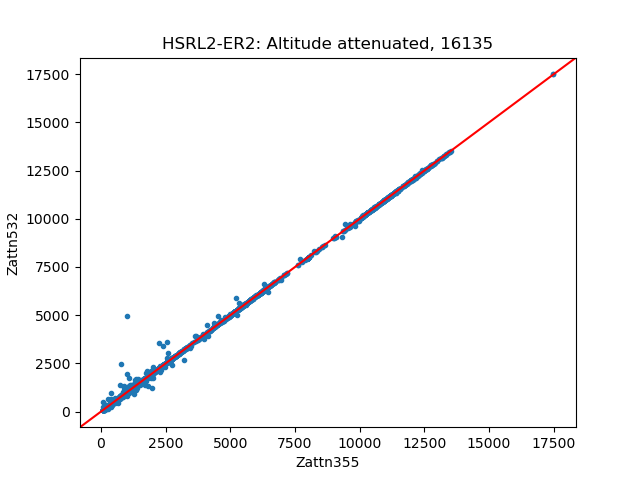

In [139]:
all_alt_attn532, all_alt_attn355
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
fig, ax = plt.subplots()
ax.scatter(all_alt_attn355, all_alt_attn532, marker='.')
ax.set(title=f'HSRL2-ER2: Altitude attenuated, {len(all_alt_attn532)}', ylabel = 'Zattn532', xlabel='Zattn355')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

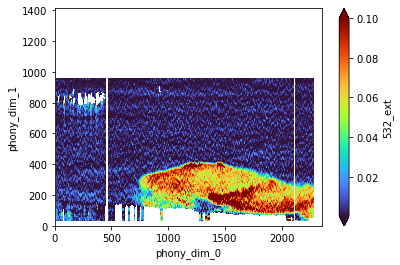

In [89]:
%matplotlib inline
fog, ax = plt.subplots()
xr.open_dataset(Path(ER2_DIR, 'HSRL2_ER2_20160826_R9.h5'), group='DataProducts')['532_ext'].plot(ax=ax, x='phony_dim_0', y='phony_dim_1', vmin=1e-4, vmax=1e-1, cmap='turbo')

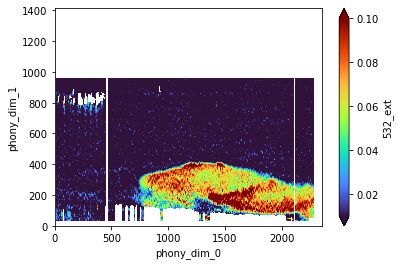

In [88]:
%matplotlib inline
fog, ax = plt.subplots()
xr.open_dataset(Path(ER2_DIR, 'HSRL2_ER2_20160826_R8.h5'), group='DataProducts')['532_ext'].plot(ax=ax, x='phony_dim_0', y='phony_dim_1', vmin=1e-2, vmax=1e-1, cmap='turbo')

#### 4. Plots : Quickloock & profils 
------------

Cas Study : HSRL2_ER2_20160823_R8_v2.nc 

In [1]:
import xarray as xr
def find_nearest_index(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [4]:
date = '20160819'
file = xr.open_dataset(f'/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/HSRL2_ER2_{date}_R8_v2.nc')
file = file.assign_coords({"altitude" : (file.altitude/1000)})
altitude = file['altitude']

path = Path(f'/homedata/nmpnguyen/ORACLES-ER2/HSRL2_ER2_{date}_R8.h5')
DataProducts = xr.open_dataset(path, group='DataProducts')
bsc_aer_532 = DataProducts['532_bsc'].values
bsc_aer_355 = DataProducts['355_bsc'].values

In [5]:
list_times_profils = [17.8, 18.68, 19.0]
for t in list_times_profils:
    print(find_nearest_index(file['time'].values, t))

457
774
889


<Figure size 432x288 with 0 Axes>

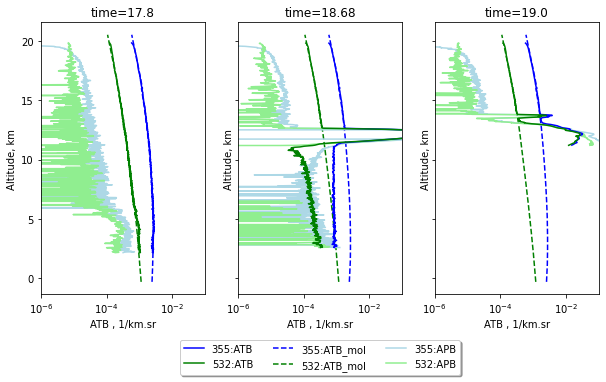

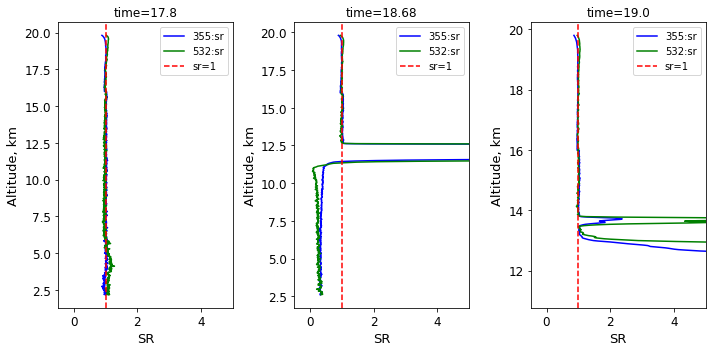

In [6]:
from matplotlib.colors import LogNorm

plt.clf()
fig, ax1s = plt.subplots(ncols=3, figsize=(10,5), sharey=True)
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['axes.labelsize'] = 13
for t, (i, ax1) in zip(list_times_profils, enumerate(ax1s.flat)):
    idt = find_nearest_index(file['time'].values, t)
#     fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,5), sharey=True)
    
    file['calibrated'].isel(wavelength=0, time=idt).plot(ax=ax1, y='altitude', label='355:ATB', color='b', xscale='log', zorder=10)
    file['calibrated'].isel(wavelength=1, time=idt).plot(ax=ax1, y='altitude', label='532:ATB', color='g', xscale='log', zorder=10)

    file['molecular'].isel(wavelength=0, time=idt).plot(ax=ax1, y='altitude', label='355:ATB_mol', color='b', linestyle='--', xscale='log')
    file['molecular'].isel(wavelength=1, time=idt).plot(ax=ax1, y='altitude', label='532:ATB_mol', color='g', linestyle='--', xscale='log')
    
    ax1.plot(bsc_aer_355[idt, :], altitude, label='355:APB', color='lightblue')
    ax1.plot(bsc_aer_532[idt, :], altitude, label='532:APB', color='lightgreen')
    
    if (i == len(ax1s)-2):
#         ax1.legend(bbox_to_anchor=(1, 0.5))
        ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3)
        
    ax1.set_xlim(1e-6, 1e-1)
    ax1.set_xlabel("ATB , 1/km.sr")
    ax1.set_ylabel("Altitude, km")
    ax1.set_title(f'time={np.round(file.time.values[idt],3)}')#('Backscatter')
 
fig, ax2s = plt.subplots(ncols=3, figsize=(10,5))
for t, (i, ax2) in zip(list_times_profils, enumerate(ax2s.flat)):
    idt = find_nearest_index(file['time'].values, t)
    psr355 = file['calibrated'].isel(wavelength=0, time=idt)/file['molecular'].isel(wavelength=0, time=idt)
    psr532 = file['calibrated'].isel(wavelength=1, time=idt)/file['molecular'].isel(wavelength=1, time=idt)
    psr355.plot(ax=ax2, y='altitude', label='355:sr', color='b')
    psr532.plot(ax=ax2, y='altitude', label='532:sr', color='g')
    ax2.axvline(1, linestyle='--', color='r', label='sr=1')
#     if (i == len(ax2s)-2):
#         ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
#           fancybox=True, shadow=True, ncol=3)
    ax2.legend(loc='best')    
    ax2.set_xlim(-0.5, 5)
    ax2.set_xlabel("SR")
    ax2.set_ylabel("Altitude, km")
    ax2.set_title(f'time={np.round(file.time.values[idt],3)}')
plt.tight_layout()
#     plt.suptitle(f'file=HSRL2_ER2_20160823_R8.h5 \ntime={np.round(file.time.values[idt],3)}')

Text(0.5, 1.0, 'HSRL-20160819, , wavelength=532')

<Figure size 432x288 with 0 Axes>

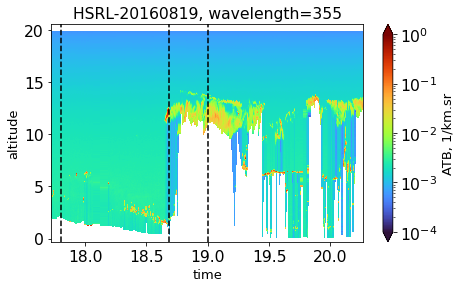

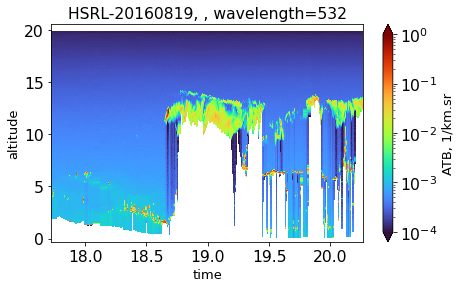

In [12]:
plt.clf()
fig, ax = plt.subplots(figsize=(7,4))
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['font.size'] = 13
vmin = 1e-4
vmax = 1e0
(file['calibrated']).isel(wavelength=0).dropna('time', 'all').plot(ax=ax, x='time', y='altitude', extend='both', 
                                                                 norm=LogNorm(vmin=vmin, vmax=vmax), cmap='turbo',
                                                                cbar_kwargs={'label':'ATB, 1/km.sr'}) #/file['molecular']
plt.title(f'HSRL-{date}, wavelength=355')
for t in list_times_profils:
    idt = find_nearest_index(file['time'].values, t)
    ax.axvline(file['time'].values[idt], linestyle='--', color='k')
time = (file['calibrated']).isel(wavelength=0).dropna('time', 'all').time

fig, ax = plt.subplots(figsize=(7,4))
(file['calibrated']).sel(wavelength=532, time=time).dropna('time', 'all').plot(ax=ax, x='time', y='altitude', extend='both', 
                                                                 norm=LogNorm(vmin=vmin, vmax=vmax), cmap='turbo',
                                                                cbar_kwargs={'label':'ATB, 1/km.sr'}) #/file['molecular']
plt.title(f'HSRL-{date}, , wavelength=532')
# for t in list_times_profils:
#     idt = find_nearest_index(file['time'].values, t)
#     ax.axvline(file['time'].values[idt], linestyle='--', color='k')

### 4bis. Check backscatter aerosols dataset

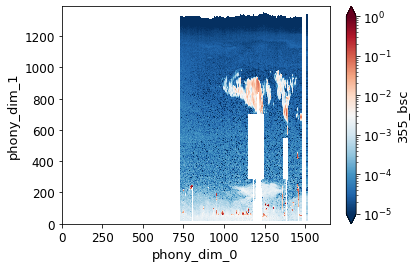

In [25]:
DataProducts['355_bsc'].plot(x='phony_dim_0', y='phony_dim_1', norm=LogNorm(vmin=1e-5, vmax=1e0))

In [58]:
bsc_aer_532 = DataProducts['532_bsc'].values
bsc_aer_355 = DataProducts['355_bsc'].values
sr_355 = (file['calibrated'].isel(wavelength=0)/file['molecular'].isel(wavelength=0)).values
sr_532 = (file['calibrated'].isel(wavelength=1)/file['molecular'].isel(wavelength=1)).values

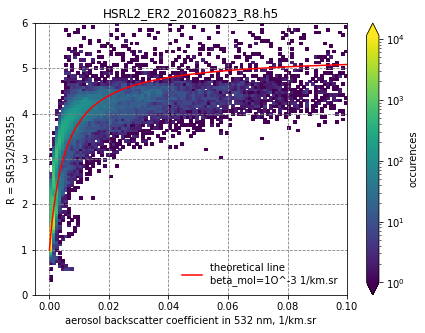

In [117]:
'''
Tracer le scatter plot de ratio SR532/SR355 en fonction de beta_part du HSRL 
Comparer avec la ligne théorique 
'''
# Mesures in 532nm
#-------------------------------------------
counts, xbins, ybins = np.histogram2d(bsc_aer_532.ravel(), (sr_532/sr_355).ravel(), 
                                      range = [[1e-4,1e-1], [0, 6]], bins=100)

fg, ax = plt.subplots(figsize=(7,5))
pax = ax.pcolormesh(xbins, ybins, counts.T, norm=LogNorm())
plt.colorbar(pax, ax=ax, label='occurences', extend='both')
plt.grid(True, which='major', axis='both', color='grey', linestyle='--')
# plt.xscale('log')
plt.xlabel('aerosol backscatter coefficient in 532 nm, 1/km.sr')
plt.ylabel('R = SR532/SR355')
plt.title(f'{path.name}')

# Théorie in 532nm
#--------------------------------------------
betamol532 = 1e-3
beta_part = np.arange(0, 1e-1, 1e-4)
ratio_sr532_sr355 = 5.3 * (betamol532 + beta_part) / (betamol532*5.3 + beta_part)
plt.plot(beta_part, ratio_sr532_sr355, color='r', label = 'theoretical line \nbeta_mol=1O^-3 1/km.sr')
plt.legend(frameon=False, loc='lower right')

In [99]:
def set_proba_histogram2d(xdata, ydata, range_data, bin_data):
    counts_data, xdata_edges, ydata_edges = np.histogram2d(xdata, ydata, range=range_data, bins=bin_data)
    proba_data = counts_data/xdata.shape[0]
    return proba_data, xdata_edges, ydata_edges

<ipython-input-129-ca6984383de3>:44: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmapp.set_over('darkgrey')
<ipython-input-129-ca6984383de3>:45: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmapp.set_under('lightgrey')


(8e-05, 0.1)

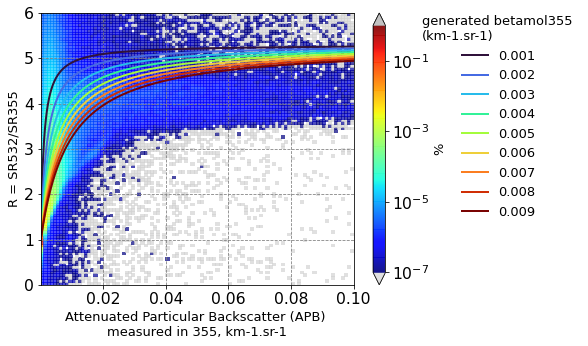

In [129]:
# Mesures in 355nm
#-------------------------------------------
import matplotlib as mpl
maindir = Path('/homedata/nmpnguyen/ORACLES-ER2/')
listfiles = sorted(maindir.glob('HSRL2_ER2*_R8.h5'))

coeffs_estimated = pd.read_csv(Path(maindir, 'coeff_estimated_by_fitting_SR532_SR355_Betapart355.csv'))['a']

# bsc_aer_532 = []
# bsc_aer_355 = []
# all_sr355 = []
# all_sr532 = []

# plt.clf()
# # fig, axs = plt.subplots(nrows = 4, ncols = 2, sharey=True, sharex=True, figsize = (15,15), constrained_layout=True)
# plt.rcParams['font.size']=13

# # for pathfile, (i, ax) in zip(listfiles, enumerate(axs.flat)):
# for pathfile in listfiles:
#     print(pathfile)
#     DataProducts = xr.open_dataset(pathfile, group = 'DataProducts')
#     bsc_aer_532.append(DataProducts['532_bsc'].values.ravel())
#     bsc_aer_355.append(DataProducts['355_bsc'].values.ravel())
#     pathfile = Path('/homedata/nmpnguyen/ORACLES-ER2/RF/Calibrated/', pathfile.name)
#     file = xr.open_dataset(pathfile)
#     sr_355 = (file['calibrated'].isel(wavelength=0)/file['molecular'].isel(wavelength=0)).values
#     sr_532 = (file['calibrated'].isel(wavelength=1)/file['molecular'].isel(wavelength=1)).values
#     all_sr355.append(sr_355.ravel())
#     all_sr532.append(sr_532.ravel())
    
#     #--------------------------------------------
#     coeff_estimated = coeffs_estimated.iloc[i]
    
    
# bsc_aer_355 = np.concatenate(bsc_aer_355)
# bsc_aer_532 = np.concatenate(bsc_aer_532)
# all_sr355 = np.concatenate(all_sr355)
# all_sr532 = np.concatenate(all_sr532)

# freq, xbins, ybins = set_proba_histogram2d(bsc_aer_355, (all_sr532/all_sr355), 
#                                           range_data = [[1e-6,1e-1], [0, 6]], bin_data=100)
fg, ax = plt.subplots(figsize=(7,5))
cmapp = mpl.cm.get_cmap("jet")
cmapp.set_over('darkgrey')
cmapp.set_under('lightgrey')
pax = ax.pcolormesh(xbins, ybins, freq.T, norm=LogNorm(vmax=1e0, vmin=1e-7), cmap = cmapp, alpha = 0.7)
cax = plt.colorbar(pax, ax=ax, label='%', extend='both')
    

# Théorie in 355nm
#--------------------------------------------
betamol355s = np.arange(1e-3, 1e-2, 1e-3)
for betamol355 in betamol355s:
    beta_part = np.arange(0, 1e-1, 1e-4)
    ratio_sr532_sr355 = 5.3 * (betamol355/5.3 + (beta_part)) / (betamol355 + (beta_part))
    ax.plot(beta_part, ratio_sr532_sr355, label=f'{np.round(betamol355,3)}', linewidth=2)
#     ax.plot(np.exp(beta_part), )

colormap = plt.cm.turbo #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i])

ax.legend(title = 'generated betamol355 \n(km-1.sr-1)', frameon=False, 
          loc='lower right', facecolor='white', framealpha=1, bbox_to_anchor=(1.75, 0.2))
ax.grid(True, which='major', axis='both', color='grey', linestyle='--')
# ax.set_title(f'{pathfile.name}, \nfitting coeff:{np.round(coeff_estimated,4)}')
ax.set_xlabel('Attenuated Particular Backscatter (APB) \nmeasured in 355, km-1.sr-1')
ax.set_ylabel('R = SR532/SR355')
ax.set_xlim(8e-5, 1e-1)
    
    # Estimation in 355nm
    #--------------------------------------------
#     y_estimated = coeff_estimated*(betamol355/coeff_estimated + beta_part)/(betamol355 + beta_part)
#     ax.plot(beta_part, y_estimated, '--', c='r', linewidth=2.5, label='fitting line')
#     ax.legend(title = 'betamol355, km-1.sr-1', frameon=True, loc='lower right', facecolor='white', framealpha=1)

#     ax.set_ylim(0,6)
#     ax.set_xticks(fontsize=14)
    
# plt.supxlabel('particles backscatter coefficient in 355nm, km-1.sr-1')
# plt.supylabel('R = SR532/SR355')

<Figure size 432x288 with 0 Axes>

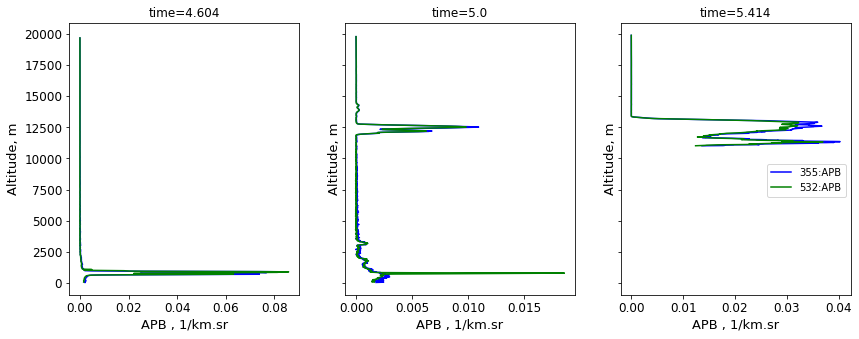

In [36]:

plt.clf()
fig, ax1s = plt.subplots(ncols=3, figsize=(14,5), sharey=True)
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['axes.labelsize'] = 13
for t, (i, ax1) in zip([4.604, 5.0, 5.414], enumerate(ax1s.flat)):
    idt = find_nearest_index(file['time'].values, t)
#     fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,5), sharey=True)
    
    ax1.plot(bsc_aer_355[idt, :], altitude, label='355:APB', color='b')
    ax1.plot(bsc_aer_532[idt, :], altitude, label='532:APB', color='g')
    
    if (i == len(ax1s)-1):
        ax1.legend(bbox_to_anchor=(1, 0.5))
        
#     ax1.set_xscale('log')
#     ax1.set_xlim(1e-5, 1e-1)
    ax1.set_xlabel("APB , 1/km.sr")
    ax1.set_ylabel("Altitude, m")
    ax1.set_title(f'time={np.round(file.time.values[idt],3)}')#('Backscatter')